### Première Partie - Importation des librairies et préparation des dataframes

### I. Importation des librairies

In [1]:
# Importons les librairies dont nous auront besoin
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from  sklearn import datasets

### II. Récupération des fichiers 

#### II.1.  Récupération des fichiers

#### II.1.1. Disponibilite Alimentaire

In [2]:
# Récupérons notre fichier  dans une variable
dispo_2017 = pd.read_csv('dispo_2017_clean.csv')

#### II.1.2. Population

In [3]:
# Récupérons notre fichier  dans une variable
population_2016_2017 = pd.read_csv('population_2016_2017_clean.csv')

#### II.1.3. Stabilité politique

In [4]:
# Récupérons notre fichier  dans une variable
stabpol_2017 = pd.read_csv('stabpol_2017_clean.csv')

#### II.1.4. Produit intérieur brut

In [5]:
# Récupérons notre fichier  dans une variable
pib_2017 = pd.read_csv('pib_2017_clean.csv')

### III.  Jointure et matrice de corrélation

#### III.1.  Jointure

In [6]:
# Renommons certains pays pour faciliter les correspondances
dispo_2017.replace("Congo","République démocratique du Congo", inplace=True)
dispo_2017.replace("Chine, continentale","Chine", inplace=True)

In [7]:
# Recherchons les correspondances entre les dataframes disponibilité et population
Dispoal_pop = pd.merge(dispo_2017,population_2016_2017, how='outer', on='Pays', indicator=True)
Dispoal_pop

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),_merge
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,68077.820746,23578.18,35383.032,36296.113,2.58,both
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,17409.520000,1559.02,56207.646,57009.756,1.43,both
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,0.000000,7725.53,2886.438,2884.169,-0.08,both
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,0.000000,12521.21,40551.392,41389.189,2.07,both
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,9101.080000,4846.99,82193.768,82658.409,0.57,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.735,58.058,0.56,right_only
235,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.559,37.115,1.52,right_only
236,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.835,104.751,-0.08,right_only
237,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.355,29.577,0.76,right_only


In [8]:
# Regroupons les produits qui sont présents sur les 2 dataframes à la fois
Dispoal_pop_both = Dispoal_pop[Dispoal_pop['_merge']=='both']
Dispoal_pop_both

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),_merge
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,68077.820746,23578.18,35383.032,36296.113,2.58,both
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,17409.520000,1559.02,56207.646,57009.756,1.43,both
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,0.000000,7725.53,2886.438,2884.169,-0.08,both
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,0.000000,12521.21,40551.392,41389.189,2.07,both
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,9101.080000,4846.99,82193.768,82658.409,0.57,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,3370.0,107.26,11795.0,4914.0,14986.0,5958.0,2292.52,724.73,3460.97,5227.660000,1446.12,9360.980,9487.203,1.35,both
168,Équateur,2585.0,65.77,23810.0,8897.0,2134.0,9465.0,3114.46,1069.43,0.00,0.000000,2921.30,16491.116,16785.361,1.78,both
169,États-Unis d'Amérique,3762.0,113.61,849821.0,207278.0,84507.0,322036.0,1717.81,570.05,68704.88,5614.250000,1779.20,323015.995,325084.756,0.64,both
170,Éthiopie,2304.0,65.64,55860.0,1259.0,2967.0,38502.0,0.00,164100.00,296700.00,68077.820746,275014.29,103603.462,106399.924,2.70,both


In [9]:
# Affichons les 'right_only'
Dispoal_pop_right = Dispoal_pop[Dispoal_pop['_merge']=='right_only']
Dispoal_pop_right.head()

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),_merge
172,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.297,77.001,-0.38,right_only
173,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.429,14.584,1.07,right_only
174,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.693,275.186,0.91,right_only
175,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.872,105.366,0.47,right_only
176,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1425.792,1494.076,4.79,right_only


In [10]:
# Affichons le nombre de lignes et de colonnes des 'right_only'
Dispoal_pop_right.shape

(67, 16)

In [11]:
# Supprimons la colonne 'merge'
Dispoal_pop_both = Dispoal_pop_both.drop('_merge', axis=1)

In [12]:
# Recherchons les correspondances entre les dataframes disponibilité + population et la stabilité politique
Dispoal_pop_stabpol = pd.merge(Dispoal_pop_both,stabpol_2017, how='left', on='Pays', indicator=True)
Dispoal_pop_stabpol.head()

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),_merge
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,68077.820746,23578.18,35383.032,36296.113,2.58,-2.67,-2.80,4.87,both
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,17409.520000,1559.02,56207.646,57009.756,1.43,-0.14,-0.28,100.00,both
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,0.000000,7725.53,2886.438,2884.169,-0.08,0.34,0.38,11.76,both
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,0.000000,12521.21,40551.392,41389.189,2.07,-1.10,-0.92,-16.36,both
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,9101.080000,4846.99,82193.768,82658.409,0.57,0.68,0.59,-13.24,both


In [13]:
# Affichons le nombre de lignes et de colonnes
Dispoal_pop_stabpol.shape

(171, 19)

In [14]:
# Regroupons les produits qui sont présents sur les 2 dataframes à la fois
Dispoal_pop_stabpol_both = Dispoal_pop_stabpol[Dispoal_pop_stabpol['_merge']=='both']
Dispoal_pop_stabpol_both

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),_merge
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,68077.820746,23578.18,35383.032,36296.113,2.58,-2.67,-2.80,4.87,both
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,17409.520000,1559.02,56207.646,57009.756,1.43,-0.14,-0.28,100.00,both
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,0.000000,7725.53,2886.438,2884.169,-0.08,0.34,0.38,11.76,both
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,0.000000,12521.21,40551.392,41389.189,2.07,-1.10,-0.92,-16.36,both
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,9101.080000,4846.99,82193.768,82658.409,0.57,0.68,0.59,-13.24,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Émirats arabes unis,3370.0,107.26,11795.0,4914.0,14986.0,5958.0,2292.52,724.73,3460.97,5227.660000,1446.12,9360.980,9487.203,1.35,0.56,0.62,10.71,both
167,Équateur,2585.0,65.77,23810.0,8897.0,2134.0,9465.0,3114.46,1069.43,0.00,0.000000,2921.30,16491.116,16785.361,1.78,-0.09,-0.07,-22.22,both
168,États-Unis d'Amérique,3762.0,113.61,849821.0,207278.0,84507.0,322036.0,1717.81,570.05,68704.88,5614.250000,1779.20,323015.995,325084.756,0.64,0.40,0.29,-27.50,both
169,Éthiopie,2304.0,65.64,55860.0,1259.0,2967.0,38502.0,0.00,164100.00,296700.00,68077.820746,275014.29,103603.462,106399.924,2.70,-1.62,-1.68,3.70,both


In [15]:
# Affichons les 'right_only'
Dispoal_pop_stabpol_right = Dispoal_pop_stabpol[Dispoal_pop_stabpol['_merge']=='right_only']
Dispoal_pop_stabpol_right.head(60)

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),_merge


In [16]:
# Supprimons la colonne 'merge'
Dispoal_pop_stabpol_both = Dispoal_pop_stabpol_both.drop('_merge', axis=1)

In [17]:
# Recherchons les correspondances entre les dataframes disponibilité + population + stabilité politique et le PIB
Dispoal_pop_stabpol_pib = pd.merge(Dispoal_pop_stabpol_both,pib_2017, how='left', on='Pays', indicator=True)
Dispoal_pop_stabpol_pib

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%),_merge
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,...,35383.032,36296.113,2.58,-2.67,-2.80,4.87,2057.1,2058.4,0.06,both
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,...,56207.646,57009.756,1.43,-0.14,-0.28,100.00,13897.1,13860.3,-0.26,both
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,...,2886.438,2884.169,-0.08,0.34,0.38,11.76,12291.9,12771.0,3.90,both
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,...,40551.392,41389.189,2.07,-1.10,-0.92,-16.36,11826.2,11737.4,-0.75,both
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,...,82193.768,82658.409,0.57,0.68,0.59,-13.24,51879.7,53071.5,2.30,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,3370.0,107.26,11795.0,4914.0,14986.0,5958.0,2292.52,724.73,3460.97,...,9360.980,9487.203,1.35,0.56,0.62,10.71,66510.9,67183.6,1.01,both
165,Équateur,2585.0,65.77,23810.0,8897.0,2134.0,9465.0,3114.46,1069.43,0.00,...,16491.116,16785.361,1.78,-0.09,-0.07,-22.22,11551.6,11617.9,0.57,both
166,États-Unis d'Amérique,3762.0,113.61,849821.0,207278.0,84507.0,322036.0,1717.81,570.05,68704.88,...,323015.995,325084.756,0.64,0.40,0.29,-27.50,58965.0,59914.8,1.61,both
167,Éthiopie,2304.0,65.64,55860.0,1259.0,2967.0,38502.0,0.00,164100.00,296700.00,...,103603.462,106399.924,2.70,-1.62,-1.68,3.70,1894.9,2021.6,6.69,both


In [18]:
# Regroupons les produits qui sont présents sur les 2 dataframes à la fois
Dispoal_pop_stabpol_pib_both = Dispoal_pop_stabpol_pib[Dispoal_pop_stabpol_pib['_merge']=='both']
Dispoal_pop_stabpol_pib_both

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%),_merge
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,...,35383.032,36296.113,2.58,-2.67,-2.80,4.87,2057.1,2058.4,0.06,both
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,...,56207.646,57009.756,1.43,-0.14,-0.28,100.00,13897.1,13860.3,-0.26,both
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,...,2886.438,2884.169,-0.08,0.34,0.38,11.76,12291.9,12771.0,3.90,both
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,...,40551.392,41389.189,2.07,-1.10,-0.92,-16.36,11826.2,11737.4,-0.75,both
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,...,82193.768,82658.409,0.57,0.68,0.59,-13.24,51879.7,53071.5,2.30,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,3370.0,107.26,11795.0,4914.0,14986.0,5958.0,2292.52,724.73,3460.97,...,9360.980,9487.203,1.35,0.56,0.62,10.71,66510.9,67183.6,1.01,both
165,Équateur,2585.0,65.77,23810.0,8897.0,2134.0,9465.0,3114.46,1069.43,0.00,...,16491.116,16785.361,1.78,-0.09,-0.07,-22.22,11551.6,11617.9,0.57,both
166,États-Unis d'Amérique,3762.0,113.61,849821.0,207278.0,84507.0,322036.0,1717.81,570.05,68704.88,...,323015.995,325084.756,0.64,0.40,0.29,-27.50,58965.0,59914.8,1.61,both
167,Éthiopie,2304.0,65.64,55860.0,1259.0,2967.0,38502.0,0.00,164100.00,296700.00,...,103603.462,106399.924,2.70,-1.62,-1.68,3.70,1894.9,2021.6,6.69,both


In [19]:
# Affichons le nombre de lignes et de colonnes des 'right_only'
Dispoal_pop_stabpol_pib_right= Dispoal_pop_stabpol_pib[Dispoal_pop_stabpol_pib['_merge']=='right_only']
Dispoal_pop_stabpol_pib_right

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%),_merge


In [20]:
# Affichons le nombre de lignes et de colonnes des 'left_only'
Dispoal_pop_stabpol_pib_left= Dispoal_pop_stabpol_pib[Dispoal_pop_stabpol_pib['_merge']=='left_only']
Dispoal_pop_stabpol_pib_left

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%),_merge
33,"Chine, Taiwan Province de",2976.0,85.71,25365.0,1669.0,14429.0,15162.0,2361.90,778.47,8962.11,...,23618.200,23674.546,0.24,0.93,0.86,-7.53,NaN,NaN,NaN,left_only
39,Cuba,3409.0,88.40,33585.0,1227.0,4582.0,9575.0,4157.32,1241.57,1468.59,...,11335.104,11339.254,0.04,0.69,0.65,-5.80,NaN,NaN,NaN,left_only
128,République populaire démocratique de Corée,2033.0,52.27,16438.0,128.0,1001.0,12532.0,25412.50,10667.35,0.00,...,25307.665,25429.825,0.48,-0.68,-0.50,-26.47,NaN,NaN,NaN,left_only
158,Venezuela (République bolivarienne du),2247.0,56.30,21360.0,71.0,4662.0,15699.0,3164.79,778.70,18648.00,...,29851.255,29402.484,-1.50,-1.02,-1.27,24.51,NaN,NaN,NaN,left_only
160,Yémen,2062.0,53.24,8926.0,277.0,6131.0,8415.0,6873.33,1751.32,7860.26,...,27168.208,27834.819,2.45,-2.79,-2.94,5.38,NaN,NaN,NaN,left_only


In [21]:
# Affichons le nombre de lignes et de colonnes
Dispoal_pop_stabpol_pib_left.shape

(5, 22)

In [22]:
# Récupérons nos 4 dataframes  dans la nouvelle variable 'fusion' et affichons la
fusion = Dispoal_pop_stabpol_pib_both
fusion

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%),_merge
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,...,35383.032,36296.113,2.58,-2.67,-2.80,4.87,2057.1,2058.4,0.06,both
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,...,56207.646,57009.756,1.43,-0.14,-0.28,100.00,13897.1,13860.3,-0.26,both
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,...,2886.438,2884.169,-0.08,0.34,0.38,11.76,12291.9,12771.0,3.90,both
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,...,40551.392,41389.189,2.07,-1.10,-0.92,-16.36,11826.2,11737.4,-0.75,both
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,...,82193.768,82658.409,0.57,0.68,0.59,-13.24,51879.7,53071.5,2.30,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,3370.0,107.26,11795.0,4914.0,14986.0,5958.0,2292.52,724.73,3460.97,...,9360.980,9487.203,1.35,0.56,0.62,10.71,66510.9,67183.6,1.01,both
165,Équateur,2585.0,65.77,23810.0,8897.0,2134.0,9465.0,3114.46,1069.43,0.00,...,16491.116,16785.361,1.78,-0.09,-0.07,-22.22,11551.6,11617.9,0.57,both
166,États-Unis d'Amérique,3762.0,113.61,849821.0,207278.0,84507.0,322036.0,1717.81,570.05,68704.88,...,323015.995,325084.756,0.64,0.40,0.29,-27.50,58965.0,59914.8,1.61,both
167,Éthiopie,2304.0,65.64,55860.0,1259.0,2967.0,38502.0,0.00,164100.00,296700.00,...,103603.462,106399.924,2.70,-1.62,-1.68,3.70,1894.9,2021.6,6.69,both


In [23]:
# Supprimons la colonne 'merge'
fusion = fusion.drop('_merge', axis=1)

In [24]:
# Recherchons les valeurs nulles
fusion.isnull().sum()

Pays                                                                  0
Disponibilité alimentaire Volailles(Kcal/personne/jour)               0
Disponibilité de protéines Volailles en quantité (g/personne/jour)    0
Disponibilité intérieure volailles                                    0
Exportations volailles - Quantité                                     0
Importations volailles - Quantité                                     0
Nourriture Volailles                                                  0
Disponibilité alimentaire volailles / Total (%)                       0
Disponibilité de protéines volailles / Total (%)                      0
Importation Volailles / Total (%)                                     0
Exportaion Volailles / Total (%)                                      0
Nourriture Volailles / Total (%)                                      0
Population-2016                                                       0
Population-2017                                                 

<AxesSubplot:>

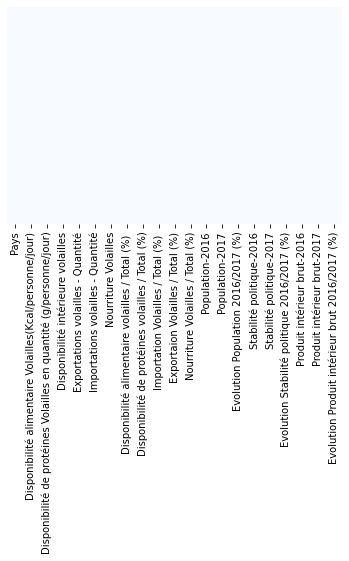

In [25]:
# Affichons les valeurs manquantes sur un graphique
sns.heatmap(fusion.isnull(),yticklabels=False, cbar=False, cmap='Blues')

In [26]:
# Vérifions le type de données de notre dataframe
fusion.dtypes

Pays                                                                   object
Disponibilité alimentaire Volailles(Kcal/personne/jour)               float64
Disponibilité de protéines Volailles en quantité (g/personne/jour)    float64
Disponibilité intérieure volailles                                    float64
Exportations volailles - Quantité                                     float64
Importations volailles - Quantité                                     float64
Nourriture Volailles                                                  float64
Disponibilité alimentaire volailles / Total (%)                       float64
Disponibilité de protéines volailles / Total (%)                      float64
Importation Volailles / Total (%)                                     float64
Exportaion Volailles / Total (%)                                      float64
Nourriture Volailles / Total (%)                                      float64
Population-2016                                                 

In [27]:
# Affichons les colonnes de notre dataframe
fusion.columns

Index(['Pays', 'Disponibilité alimentaire Volailles(Kcal/personne/jour)',
       'Disponibilité de protéines Volailles en quantité (g/personne/jour)',
       'Disponibilité intérieure volailles',
       'Exportations volailles - Quantité',
       'Importations volailles - Quantité', 'Nourriture Volailles',
       'Disponibilité alimentaire volailles / Total (%) ',
       'Disponibilité de protéines volailles / Total (%)',
       'Importation Volailles / Total (%) ',
       'Exportaion Volailles / Total (%)', 'Nourriture Volailles / Total (%)',
       'Population-2016', 'Population-2017',
       'Evolution Population 2016/2017 (%)', 'Stabilité politique-2016',
       'Stabilité politique-2017',
       'Evolution Stabilité politique 2016/2017 (%)',
       'Produit intérieur brut-2016', 'Produit intérieur brut-2017',
       'Evolution Produit intérieur brut 2016/2017 (%)'],
      dtype='object')

In [28]:
# Remplaçons les valeurs nulles par la moyenne
fusion = fusion.fillna(fusion.mean())
fusion

C:\Users\moust\AppData\Local\Temp/ipykernel_18872/5200386.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fusion = fusion.fillna(fusion.mean())


,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%)
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,...,23578.18,35383.032,36296.113,2.58,-2.67,-2.80,4.87,2057.1,2058.4,0.06
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,...,1559.02,56207.646,57009.756,1.43,-0.14,-0.28,100.00,13897.1,13860.3,-0.26
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,...,7725.53,2886.438,2884.169,-0.08,0.34,0.38,11.76,12291.9,12771.0,3.90
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,...,12521.21,40551.392,41389.189,2.07,-1.10,-0.92,-16.36,11826.2,11737.4,-0.75
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,...,4846.99,82193.768,82658.409,0.57,0.68,0.59,-13.24,51879.7,53071.5,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Émirats arabes unis,3370.0,107.26,11795.0,4914.0,14986.0,5958.0,2292.52,724.73,3460.97,...,1446.12,9360.980,9487.203,1.35,0.56,0.62,10.71,66510.9,67183.6,1.01
165,Équateur,2585.0,65.77,23810.0,8897.0,2134.0,9465.0,3114.46,1069.43,0.00,...,2921.30,16491.116,16785.361,1.78,-0.09,-0.07,-22.22,11551.6,11617.9,0.57
166,États-Unis d'Amérique,3762.0,113.61,849821.0,207278.0,84507.0,322036.0,1717.81,570.05,68704.88,...,1779.20,323015.995,325084.756,0.64,0.40,0.29,-27.50,58965.0,59914.8,1.61
167,Éthiopie,2304.0,65.64,55860.0,1259.0,2967.0,38502.0,0.00,164100.00,296700.00,...,275014.29,103603.462,106399.924,2.70,-1.62,-1.68,3.70,1894.9,2021.6,6.69


In [29]:
#Retrait du pays 'France' sur notre échantillon 
fusion = fusion[fusion['Pays'] != 'France']

In [30]:
# remplacons les valeurs inf par 0
fusion. replace([np. inf , -np. inf ], 0 , inplace= True )

C:\Users\moust\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### III.2.  Matrice de corrélation

Une matrice de corrélation est un array contenant des coefficients de corrélation entre variables. Chaque cellule du array représente la corrélation entre deux variables. La valeur est comprise entre -1 et 1. Une matrice de corrélation est utilisée pour résumer les données, comme diagnostic pour les analyses avancées et comme entrée dans une analyse plus avancée. 

In [31]:
# Affichons le tableau de corrélation de notre dataframe
# créons la matrice de corrélation avec .corr
fusion.corr()

,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%)
Disponibilité alimentaire Volailles(Kcal/personne/jour),1.000000,0.875396,0.135521,0.345034,0.406051,0.078750,-0.381421,-0.232877,0.069386,-0.025036,-0.281968,-0.012185,-0.013698,-0.535068,0.381188,0.386630,0.095118,0.632624,0.631565,0.166869
Disponibilité de protéines Volailles en quantité (g/personne/jour),0.875396,1.000000,0.064268,0.260882,0.318180,0.025814,-0.324745,-0.157593,-0.010528,-0.021787,-0.215710,-0.047632,-0.049106,-0.529405,0.437649,0.438233,0.075741,0.681045,0.681968,0.160388
Disponibilité intérieure volailles,0.135521,0.064268,1.000000,0.736605,0.530132,0.890158,0.041262,0.005382,0.321754,0.216202,0.015158,0.822486,0.821777,-0.077601,-0.155212,-0.150214,0.014826,0.026075,0.025385,0.054998
Exportations volailles - Quantité,0.345034,0.260882,0.736605,1.000000,0.637398,0.500941,-0.139808,-0.074694,0.223486,0.053414,-0.094220,0.347408,0.345847,-0.211832,0.042054,0.036166,0.005633,0.236367,0.234546,0.022797
Importations volailles - Quantité,0.406051,0.318180,0.530132,0.637398,1.000000,0.528980,-0.096313,-0.064924,0.157290,0.159398,-0.073176,0.409154,0.407838,-0.205097,0.010338,0.014338,0.043531,0.337672,0.333773,0.008522
Nourriture Volailles,0.078750,0.025814,0.890158,0.500941,0.528980,1.000000,0.119555,0.045625,0.202352,0.311746,0.069677,0.975882,0.975497,-0.047043,-0.191107,-0.177709,0.006975,0.003922,0.003700,0.089428
Disponibilité alimentaire volailles / Total (%),-0.381421,-0.324745,0.041262,-0.139808,-0.096313,0.119555,1.000000,0.313112,-0.012201,-0.018013,0.431340,0.151533,0.153369,0.434910,-0.435345,-0.424897,-0.076199,-0.337148,-0.336238,-0.117673
Disponibilité de protéines volailles / Total (%),-0.232877,-0.157593,0.005382,-0.074694,-0.064924,0.045625,0.313112,1.000000,0.070902,-0.005155,0.978501,0.086045,0.087582,0.245685,-0.279512,-0.280247,-0.019219,-0.185398,-0.184476,0.065423
Importation Volailles / Total (%),0.069386,-0.010528,0.321754,0.223486,0.157290,0.202352,-0.012201,0.070902,1.000000,-0.028405,0.062442,0.192982,0.193342,0.011629,-0.160347,-0.160347,0.036689,-0.052141,-0.051453,0.047035
Exportaion Volailles / Total (%),-0.025036,-0.021787,0.216202,0.053414,0.159398,0.311746,-0.018013,-0.005155,-0.028405,1.000000,-0.008759,0.323713,0.323831,0.019852,-0.065570,-0.062369,0.013757,-0.111249,-0.110302,0.137156


Text(0.5, 1.0, 'carte de correlation de Pearson')

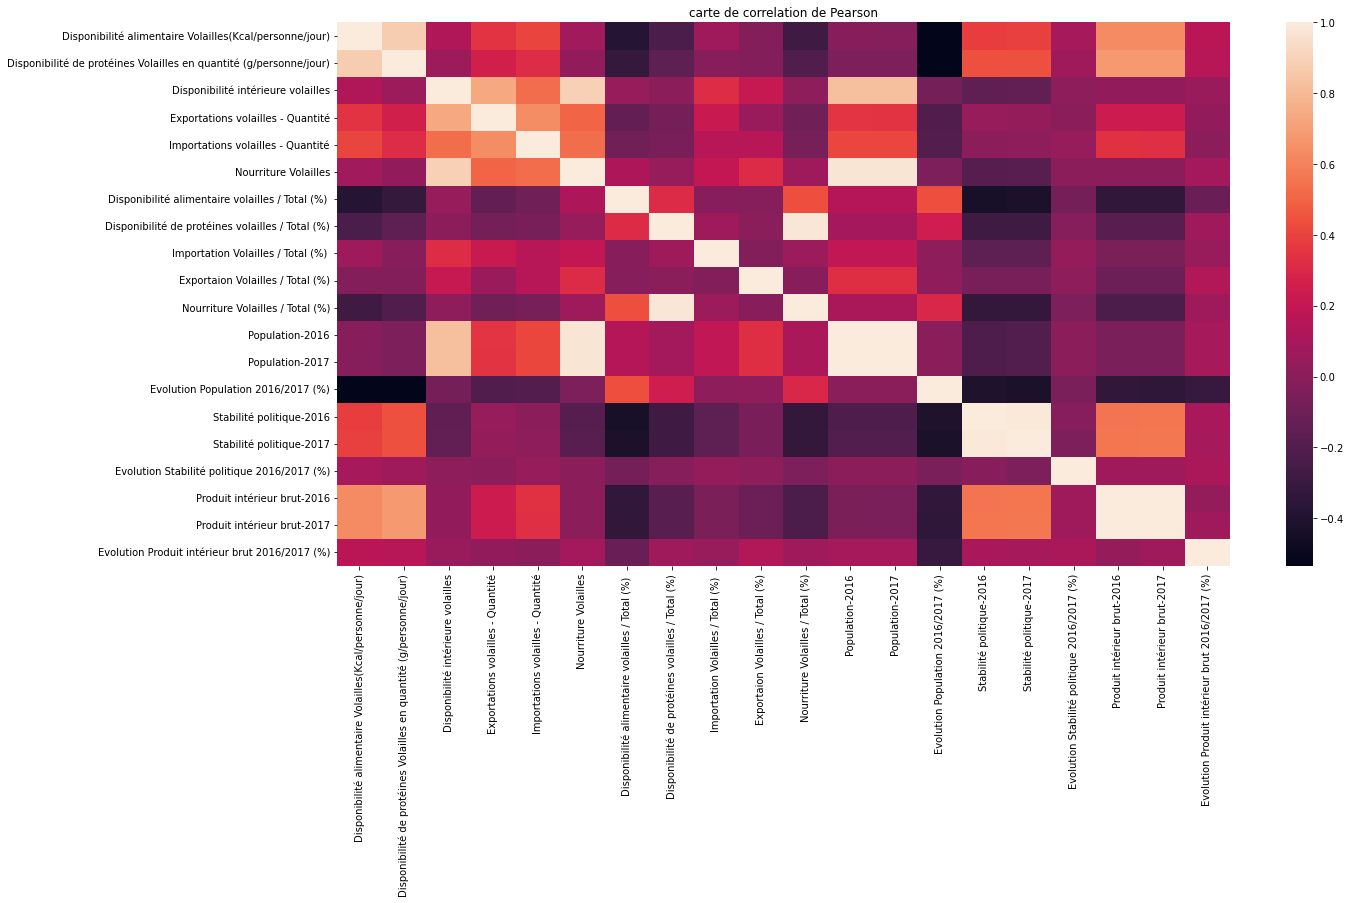

In [32]:
# Représentons la matrice de correlation
plt.figure(figsize=(20,10))
sns.heatmap(fusion.corr()).set_title('carte de correlation de Pearson')

Notons que la moitié supérieure du triangle de la matrice de corrélation est symétrique à la moitié inférieure du triangle. Ainsi, il n'est pas nécessaire que notre carte thermique affiche la matrice entière
Pour rendre cette matrice optimale, mieux lisible, nous allons retirer les valeurs qui se repètent

Pour créer notre carte thermique, nous transmettons notre matrice de corrélation et le masque que nous avons créé , ainsi que des paramètres personnalisés pour rendre notre carte thermique plus agréable.

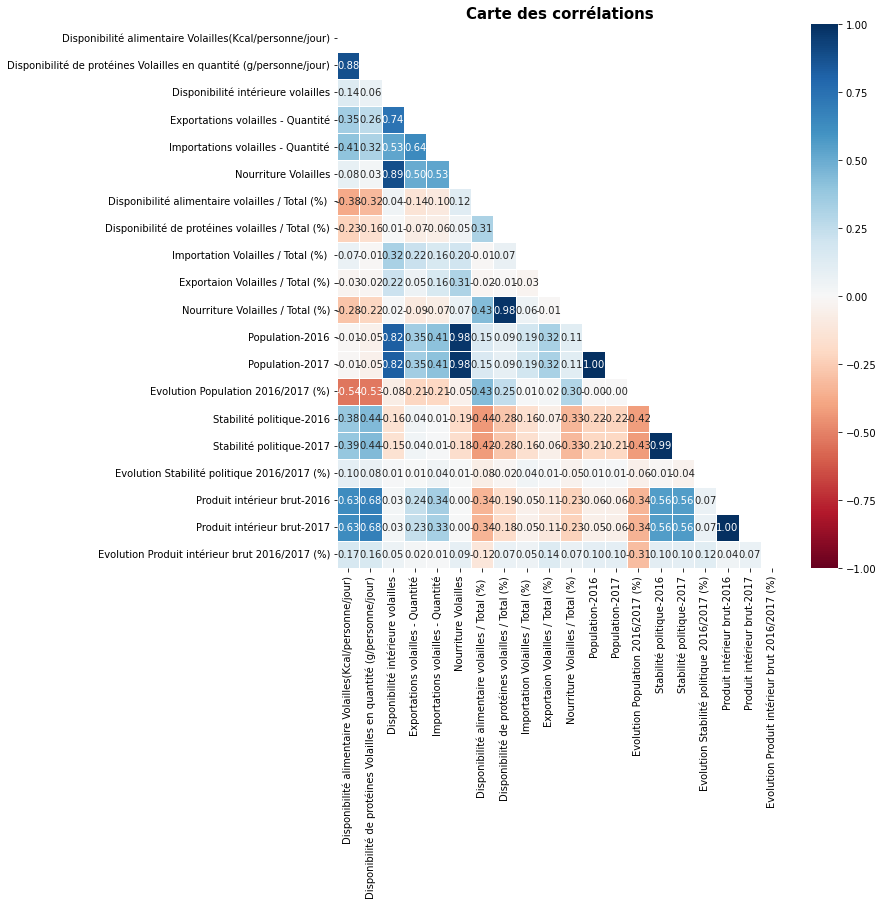

In [33]:
# Affichons une carte de correlations optimale avec les annotations
plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(fusion.corr(), dtype=bool))
sns.heatmap(fusion.corr(), mask=mask, center=0, cmap='RdBu', 
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations', fontsize = 15, fontweight='bold')
plt.show()

Les variables ayant une correlation positive forte sont :


 - 'Population-2017' et 'Nourriture Volailles' = 0.97

 - 'Nourriture Volailles / Total (%)' et 'Disponibilité de protéines volailles / Total (%)' = 0.98

 - 'Nourriture Volailles' et 'Disponibilité intérieure volailles' = 0.89

 - 'Disponibilité de protéines Volailles en quantité (g/personne/jour)'et Disponibilité alimentaire 

 - Volailles(Kcal/personne/jour)' = 0.88
 Plus la disponibilité de proteines est élévée plus la disponibilité en kcal par personne est élevée

 - 'Population-2017' et 'Disponibilité intérieure volailles' = 0.82
 
  Plus la population évolue plus il ya de disponibilité 


 - 'Exportations volailles - Quantité' et 'Disponibilité intérieure volailles' = 0.74 

 - 'Stabilité politique' et 'Produit interieur brut' = 0.56 
 

In [34]:
# Créons une nouvelle variable et remplacons 'index' par 'Pays'
fusion_pays=fusion.set_index('Pays')
fusion_pays

,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%)
Pays,,,,,,,,,,,,,,,,,,,,
Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,68077.820746,23578.18,35383.032,36296.113,2.58,-2.67,-2.80,4.87,2057.1,2058.4,0.06
Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,17409.520000,1559.02,56207.646,57009.756,1.43,-0.14,-0.28,100.00,13897.1,13860.3,-0.26
Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,0.000000,7725.53,2886.438,2884.169,-0.08,0.34,0.38,11.76,12291.9,12771.0,3.90
Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,0.000000,12521.21,40551.392,41389.189,2.07,-1.10,-0.92,-16.36,11826.2,11737.4,-0.75
Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,9101.080000,4846.99,82193.768,82658.409,0.57,0.68,0.59,-13.24,51879.7,53071.5,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,3370.0,107.26,11795.0,4914.0,14986.0,5958.0,2292.52,724.73,3460.97,5227.660000,1446.12,9360.980,9487.203,1.35,0.56,0.62,10.71,66510.9,67183.6,1.01
Équateur,2585.0,65.77,23810.0,8897.0,2134.0,9465.0,3114.46,1069.43,0.00,0.000000,2921.30,16491.116,16785.361,1.78,-0.09,-0.07,-22.22,11551.6,11617.9,0.57
États-Unis d'Amérique,3762.0,113.61,849821.0,207278.0,84507.0,322036.0,1717.81,570.05,68704.88,5614.250000,1779.20,323015.995,325084.756,0.64,0.40,0.29,-27.50,58965.0,59914.8,1.61


### Deuxième Partie - Analyse des données

### I.  Analyse en composantes principales (ACP)

L'analyse en composantes principales (ACP) permet de transformer des variables corrélées en variables décorrélées baptisée "composantes principales". Plus précisément, cette méthode vise à réduire le nombre de variables appliquées à des individus, pour simplifier les observations tout en conservant un maximum d’informations. Seules une, deux ou trois variables dites "composantes principales" sont conservées.

Il y a deux manières pour déterminer le nombre d’axes à prendre en compte :

- Un critère “absolu” : ne retenir que les axe dont les valeurs propres sont supérieures à 1 (c’est le critère de Kaiser).
- Un critère “relatif” : retenir les valeurs propres qui “dominent” les autres, en se référant au graphique en barres des valeurs propres (“screeplot”, chez les Anglo-saxons). 

Aussi, une ACP permet de projeter sur un plan, dit factoriel, un nuage de points ayant plus de 3 dimensions. Ici, nos données ont 19 variables donc 19 dimensions. La visualisation se fait à l’aide d’un cercle de corrélation.

#### I.1.  Préparation des données pour l'ACP

In [35]:
# supprimons des colonnes non numériques 
# On garde tout sauf 'Pays'
liste_col = ['Disponibilité alimentaire Volailles(Kcal/personne/jour)',
       'Disponibilité de protéines Volailles en quantité (g/personne/jour)',
       'Disponibilité intérieure volailles',
       'Exportations volailles - Quantité',
       'Importations volailles - Quantité', 'Nourriture Volailles','Population-2016',
       'Population-2017','Produit intérieur brut-2016', 'Produit intérieur brut-2017',
       'Disponibilité alimentaire volailles / Total (%) ',
       'Disponibilité de protéines volailles / Total (%)',
       'Nourriture Volailles / Total (%)',
       'Importation Volailles / Total (%) ',
       'Exportaion Volailles / Total (%)',  'Evolution Population 2016/2017 (%)',
       'Evolution Produit intérieur brut 2016/2017 (%)', 'Stabilité politique-2016',
       'Stabilité politique-2017',]

In [36]:
# Créons une nouvelle variable avec nos colonnes numériques
data_pca = fusion[liste_col]
data_pca

,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Population-2016,Population-2017,Produit intérieur brut-2016,Produit intérieur brut-2017,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Nourriture Volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Evolution Population 2016/2017 (%),Evolution Produit intérieur brut 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017
0,1997.0,54.09,15139.0,601.0,4555.0,12968.0,35383.032,36296.113,2057.1,2058.4,39940.00,10016.67,23578.18,15706.90,68077.820746,2.58,0.06,-2.67,-2.80
1,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,56207.646,57009.756,13897.1,13860.3,2088.81,590.79,1559.02,1754.86,17409.520000,1.43,-0.26,-0.14,-0.28
2,3400.0,119.50,4879.0,156.0,884.0,3631.0,2886.438,2884.169,12291.9,12771.0,4000.00,1908.95,7725.53,2326.32,0.000000,-0.08,3.90,0.34,0.38
3,3345.0,92.85,45365.0,743.0,19718.0,33056.0,40551.392,41389.189,11826.2,11737.4,15204.55,4713.20,12521.21,985900.00,0.000000,2.07,-0.75,-1.10,-0.92
4,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,82193.768,82658.409,51879.7,53071.5,5012.68,1307.41,4846.99,7903.80,9101.080000,0.57,2.30,0.68,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,3370.0,107.26,11795.0,4914.0,14986.0,5958.0,9360.980,9487.203,66510.9,67183.6,2292.52,724.73,1446.12,3460.97,5227.660000,1.35,1.01,0.56,0.62
165,2585.0,65.77,23810.0,8897.0,2134.0,9465.0,16491.116,16785.361,11551.6,11617.9,3114.46,1069.43,2921.30,0.00,0.000000,1.78,0.57,-0.09,-0.07
166,3762.0,113.61,849821.0,207278.0,84507.0,322036.0,323015.995,325084.756,58965.0,59914.8,1717.81,570.05,1779.20,68704.88,5614.250000,0.64,1.61,0.40,0.29
167,2304.0,65.64,55860.0,1259.0,2967.0,38502.0,103603.462,106399.924,1894.9,2021.6,0.00,164100.00,275014.29,296700.00,68077.820746,2.70,6.69,-1.62,-1.68


Afin de préparer nos données pour l'ACP,

On créé d'abord un objet (nommé ici pca) qui va contenir le résultat de l'ACP. 

Dans la fonction PCA(), on pourra aussi indiquer les paramètres tels que le nombre de composants à retenir (n_components - ici on garde tout).
Ensuite, on ajuste (fit en anglais) sur des données avec la fonction fit() de l'objet précédemment créé. Dans cette fonction, nous devons donc passer les données à utiliser (variables uniquement quantitatives).

Si l'on souhaite une ACP normée, il nous faut standardiser les données, avec par exemple la fonction scale() du sous-module preprocessing. Pour cela, on importe les données et on les centre-réduit avant d'appliquer notre ACP.

In [37]:
# préparation des données pour l'ACP
pca = PCA()
pca.fit(data_pca)

# pour avoir les intitulés
X = data_pca.values
names = data_pca.index 
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

####  Variance expliquée

L'objet pca comprend maintenant un certain nombre d'objets et de fonctions. Le premier objet est le tableau des variances expliquées (explained_variance_ - proportionnelles aux valeurs propres) par chaque dimension, et le ratio (proportion) de variance expliquée par dimension (explained_variance_ratio_).

In [38]:
pca.explained_variance_
pca.explained_variance_ratio_

array([2.79223316e-01, 2.48443462e-01, 9.53888722e-02, 7.14760216e-02,
       6.29262697e-02, 5.02780007e-02, 4.15928744e-02, 3.99604951e-02,
       3.22569153e-02, 2.96832944e-02, 2.12708231e-02, 1.74971488e-02,
       5.63608451e-03, 2.57625055e-03, 7.03294933e-04, 6.14125978e-04,
       4.44607226e-04, 2.79676164e-05, 1.75059729e-07])

In [39]:
pca.explained_variance_ratio_.cumsum()

array([0.27922332, 0.52766678, 0.62305565, 0.69453167, 0.75745794,
       0.80773594, 0.84932882, 0.88928931, 0.92154623, 0.95122952,
       0.97250035, 0.98999749, 0.99563358, 0.99820983, 0.99891312,
       0.99952725, 0.99997186, 0.99999982, 1.        ])

 #### I.2.  Application 

 #### I.2.1  Eboulis des valeurs propres (Scree plot)

Le graphique suivant nous donne l'évolution de la variance expliquée en fonction du nombre de composantes

Scree plot (pour le test du coude) est une autre technique graphique utile dans la rétention des Composantes principales. Nous devrions garder les Composantes principales là où il y a un changement brusque dans la pente de la ligne reliant les Composantes principales adjacentes. 

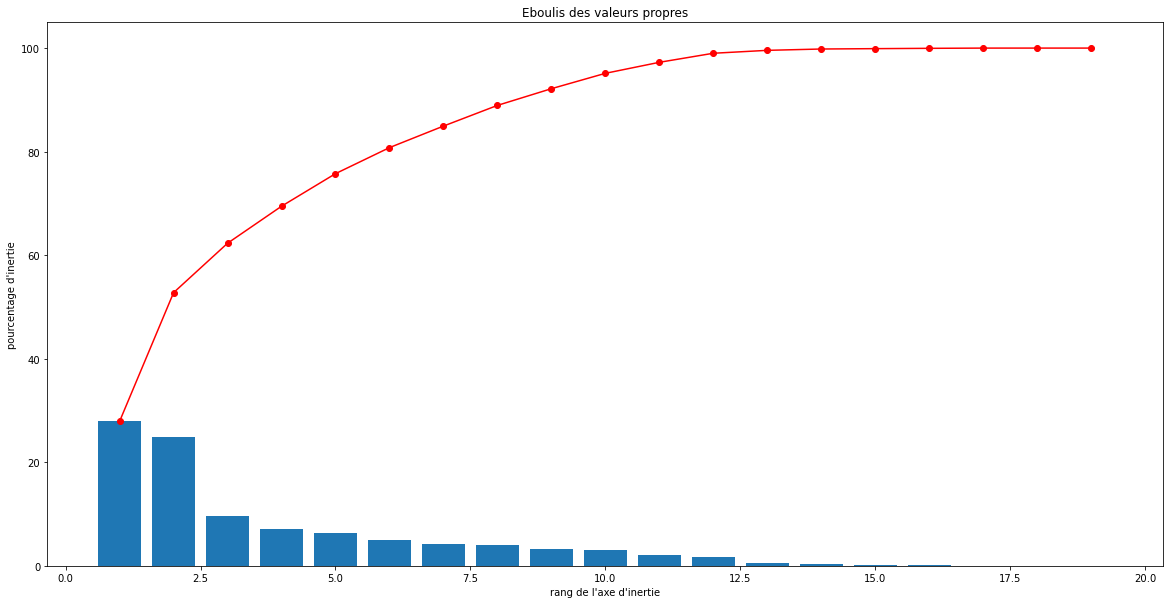

In [40]:
# Retenons les valeurs propres qui “dominent” 
# Représentation de la variance expliquée 
scree = pca.explained_variance_ratio_*100
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')

    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

On remarque ici qu'avec seulement trois dimensions suffisent à expliquer 62 % de la variance des données.

Le changement brusque s'opère au niveau de la deuxième composante.

Idéalement, les deux premières valeurs propres correspondent à un % élevé de la variabilité soit (53 %),
si bien que la représentation sur les deux premiers axes factoriels est de bonne qualité.

Les deux premières composantes absorbent un peu plus de la moitié de la variabilité

#### I.2.2  Cercle des corrélations 

 Recherche des groupes de variables fortement corrélées deux à deux entre elles, l'objectif est de pouvoir les synthétiser par une variable unique F1 et F2 (nos composantes principales).

Le cercle des corrélations  correspond à une projection des variables initiales sur un 
plan à deux dimensions constitué par les deux premiers facteurs. Lorsque deux variables sont
loin du centre du graphique, alors si elles sont : proches les unes par rapport aux autres,
alors elles sont significativement positivement corrélées (r proche de 1), orthogonales les
unes par rapport aux autres, alors elles sont significativement non-corrélées (r proche de 0),
symétriquement opposées par rapport au centre, alors elles sont significativement
négativement corrélées (r proche de -1).

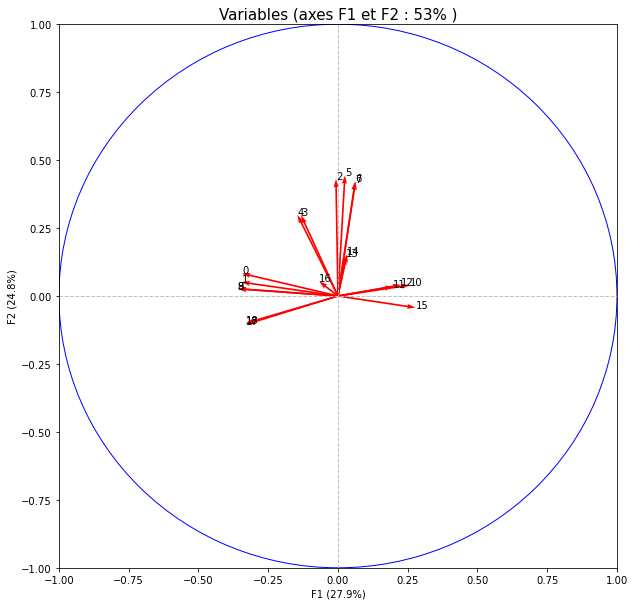

In [41]:
# Représentons le Cercle des corrélations de nos variables
pcs = pca.components_

fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, data_pca.index[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Variables (axes F1 et F2 : 53% )', fontsize=15)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.show()

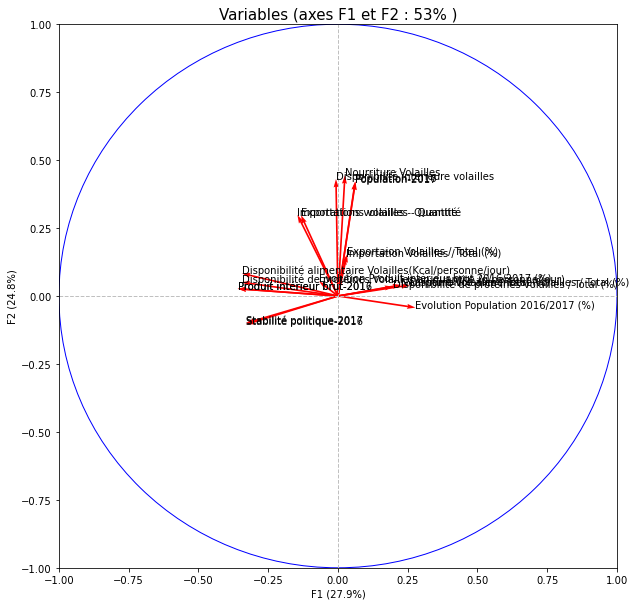

In [42]:
# Représentons le Cercle des corrélations de nos variables
pcs = pca.components_

fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], 
           angles='xy', scale_units='xy', scale=1, color='r', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, data_pca.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Variables (axes F1 et F2 : 53% )', fontsize=15)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.show()

Les points situés près du centre sont donc généralement mal représentés par le plan factoriel. Leur interprétation ne peut donc pas être effectuée avec confiance.

On s’intéresse donc essentiellement aux points bien représentés ceux situés loin du centre.

#### I.2.3  Matrice de corrélation

Il est maintenant possible de représenter les données sur le premier plan factoriel. Dans ce graphique, il est important de noter le pourcentage de variance expliquée.

Dans un premier temps affichons la matrice de corrélation

In [43]:
# nb individus
n = X_scaled.shape[0] 
# nb variables
p = X_scaled.shape[1] 

In [44]:
# valeurs propres
eigval = (n-1) / n * pca.explained_variance_ratio_ # valeurs propres
# racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval) 

In [45]:
# matrice vide pour avoir les coordonnées
corvar = np.zeros((19,p)) 
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

In [46]:
coordvar = pd.DataFrame({'Variables': data_pca.columns, 'DIM1': corvar[:,0], 'DIM2': corvar[:,1]})
coordvar.index=coordvar['Variables']

In [47]:
del coordvar['Variables']

In [48]:
coordvar

,DIM1,DIM2
Variables,,
Disponibilité alimentaire Volailles(Kcal/personne/jour),-0.181276,0.041268
Disponibilité de protéines Volailles en quantité (g/personne/jour),-0.182098,0.025293
Disponibilité intérieure volailles,-0.003729,0.213784
Exportations volailles - Quantité,-0.069772,0.147807
Importations volailles - Quantité,-0.076479,0.148162
Nourriture Volailles,0.013142,0.220488
Population-2016,0.032559,0.209344
Population-2017,0.033102,0.209232
Produit intérieur brut-2016,-0.188963,0.013240


<AxesSubplot:ylabel='Variables'>

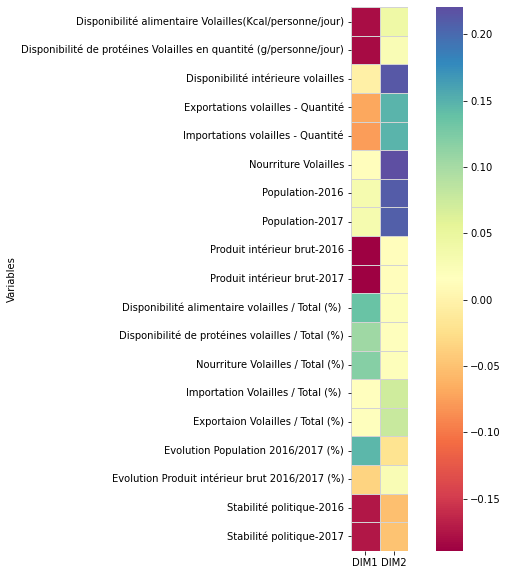

In [49]:
# matrice de corréclation
plt.figure(figsize=(10,10)) 
sns.heatmap(coordvar, cmap='Spectral', square=True , linecolor="lightgray", linewidths=1)

Les variables du facteur 1 sont fortement correlées mais négativement

Les variables du facteur 2 sont fortement correlées mais positivement

Les variables majeures qui contribuent au facteur (F1) sont : 

    _ Disponibilité alimentaire Volailles(Kcal/personne/jour)
    _Disponibilité de protéines Volailles en quantité (g/personne/jour)   
    _ Produit intérieur brut-2016
    _ Produit intérieur brut-2017   
    _ Stabilité politique-2016 
    _ Stabilité politique-2017 
    
 Les variables majeures qui contribuent au facteur (F2) sont :
 
    
    _ Disponibilité intérieure volailles 
    _ Exportations volailles - Quantité 
    _ Importations volailles - Quantité 
    _Importation Volailles / Total
    _ Exportaion Volailles / Total 
    _ Nourriture Volailles 
    _ Population 2016 
    _ Population 2017 
    

De ces observations, nous pouvons conclure,

Sur la composante F2 on peut identifier un groupe de variables plus représentatif du régime alimentaire, comportement
Sur la composante F1 la réprésentation des variables socio économiques (Pib,import, export…).

#### I.2.4 Graphique des observations 

Dans la figure 2, nous avons présenté le graphique des observations qui correspond à l'un
des objectifs de l'ACP. Il permet de représenter les individus sur une carte à deux dimensions,
et ainsi d'identifier des tendances


Près de 53 % de la variance est expliquée avec les deux premières composantes principales.

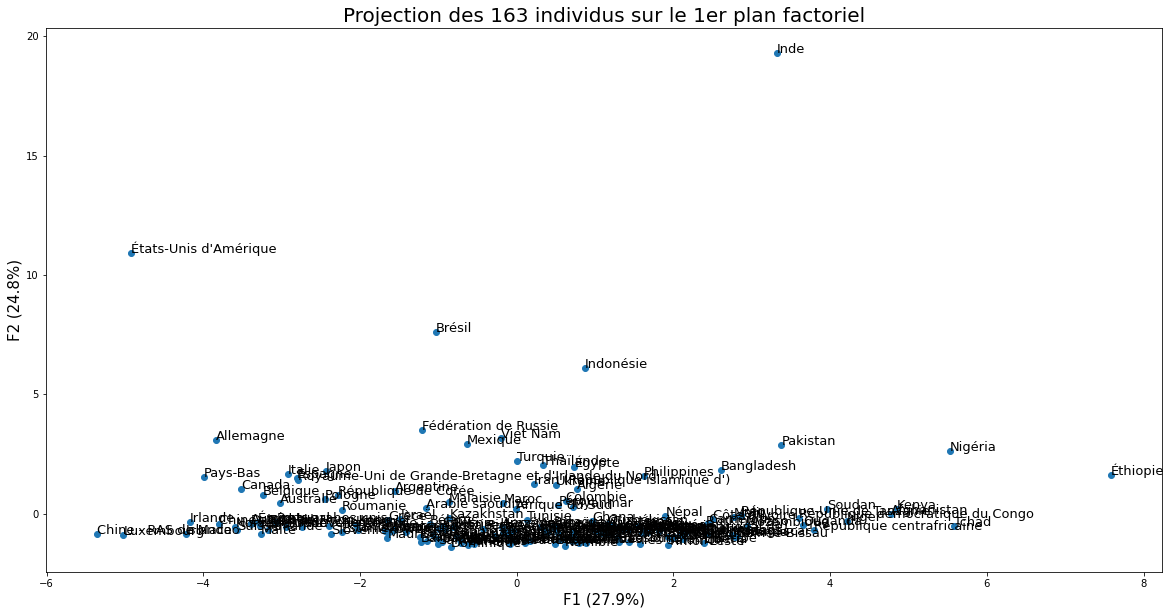

In [50]:
#Projection des 163 individus sur le premier plan factoriel (F1, F2)

#Coordonnées factorielles 

X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 10))


plt.scatter(X_projected[:, 0], X_projected[:, 1])
for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    plt.text(x, y, fusion_pays.index[i], fontsize='13') 

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=15)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=15)
plt.title("Projection des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]), fontsize=20)

plt.show()

Les pays à droite de la dimension F1 ont :

    _ PIB faible 
    
    _ Stabilité politique faible 
   
    _ Disponibilités en calories par habitant faible
   
    _ Disponibilités en protéines protéines par habitant faible 

Les pays à gauche de la dimension F2 ont :

    _ PIB élevé 
    
    _ Stabilité politique élevé
   
    _ Disponibilités en calories par habitant élevé
   
    _ Disponibilités en protéines protéines par habitant élevé

### II. Clustering hiérarchique ( CAH )

Dans la partie précédente, nous avons travaillé à synthétiser les variables, c'est-à-dire à réduire le nombre de colonnes de notre tableau de données.

Dans cette partie, nous allons regrouper les lignes, c'est-à-dire que nous allons créer des groupes d'individus : nous allons partitionner les données.

Le partitionnement ou clustering a pour objectif de créer des groupes d’observations homogènes.

Nous allons maintenant réaliser un *clustering K-Means* pour plusieurs tailles de clusters, et pour chacune de ces tailles nous allons calculer le coefficient de silhouette, puis l'inertie pour pouvoir ensuite choisir la taille de cluster la plus appropriée. 

- Classification : on regroupe nos individus dans des classes
- Ascendante : on part du niveau le plus fin (des individus)
- Hiérarchique : la méthode aboutit à la construction d’un arbre

####  II.1 Méthode des liens et méthode de Ward  

In [51]:
# matrice de distance
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

Méthode des liens et méthode de Ward
Que ce soit avec l'approche ascendante ou descendante, on a besoin de mesurer la distance entre 2 clusters.

La distance entre 2 points, c'est assez intuitif. Mais comme un cluster est composé de plusieurs points, il y a différentes manières de considérer une distance entre 2 clusters. On les appelle les méthodes de lien (linkage methods), car ce sont elles qui permettent de lier les clusters lorsque l'on construit petit à petit l'arborescence.

Grâce à la librairie scipy, on peut calculer nos distances très simplement. Cette matrice de distance est notée en général Z :

####  II.2 Dendogramme

Cette technique est spécifique à la méthode de clustering hiérarchique agglomérative. La méthode hiérarchique agglomérative de clustering commence par considérer chaque point comme un cluster séparé et commence à joindre les points aux clusters de manière hiérarchique en fonction de leurs distances. Dans un blog séparé, nous nous concentrerons sur les détails de cette méthode. Pour obtenir le nombre optimal de clusters pour le clustering hiérarchique, nous utilisons un dendrogramme qui est un graphique arborescent qui montre les séquences de fusions ou de scissions de clusters.

Si deux clusters sont fusionnés, le dendrogramme les joindra dans un graphique et la hauteur de la jointure sera la distance entre ces clusters.

####  II.2.1 Dendogramme global

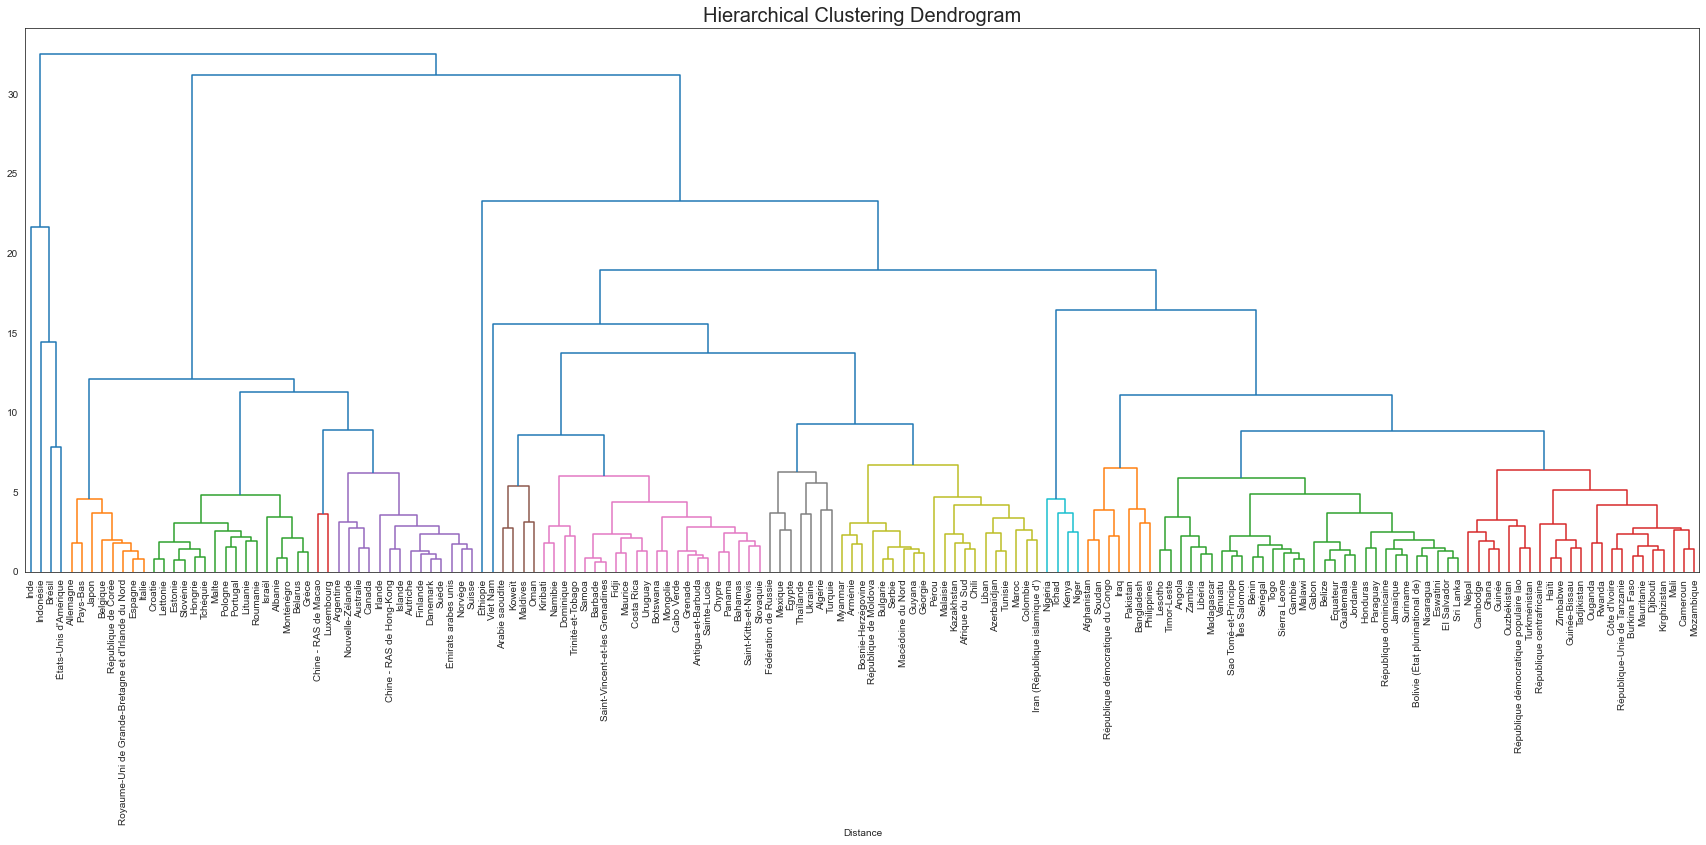

In [52]:
#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(30,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = fusion_pays.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.show()

Une fois le dendrogramme obtenu, nous pouvons choisir en combien de clusters nous pouvons diviser notre arbre. Ici, une partition en 5 clusters permet d’avoir des groupes de taille raisonnable à analyser.

Graphiquement, on voit bien que la méthode de Ward a permis de minimiser les distances intra-classes à chaque regroupement.

####  II.2.2 Dendogramme partitionné

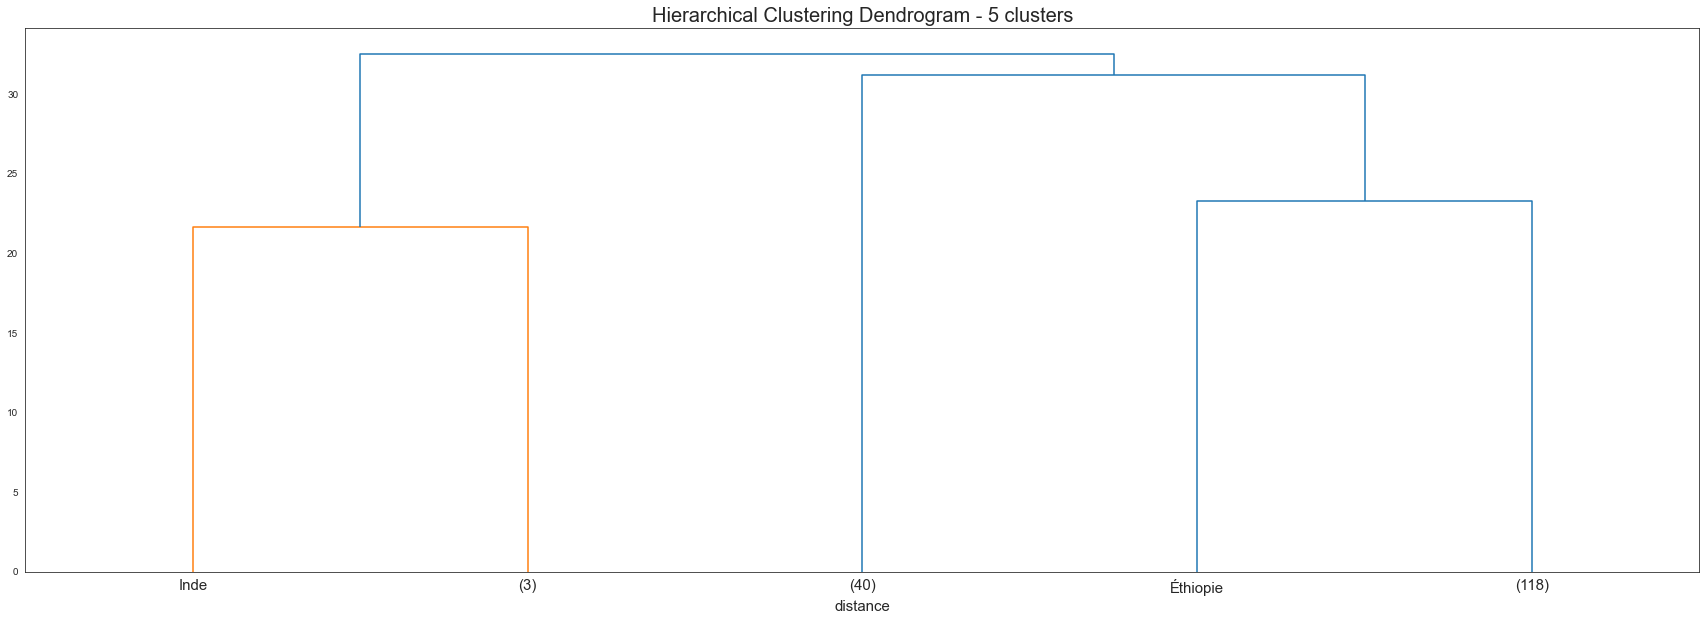

In [53]:
#Détermination de la valeur optimale de K avec la méthode de Ward
#Coupage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = fusion_pays.index, p=5, truncate_mode='lastp', leaf_font_size=15)
plt.show()

Il apparaît donc 5 groupes de pays, dont des groupes contenant seulement 1 pays à savoir l'Inde et l'Ethiopie.

Afin d'éviter les groupes d'un pays nous allons rassembler les groupes proches c'est-à-dire *l'Inde du groupe constitué de 3 pays et *l'éthiopie du groupe constitué de 118 pays.

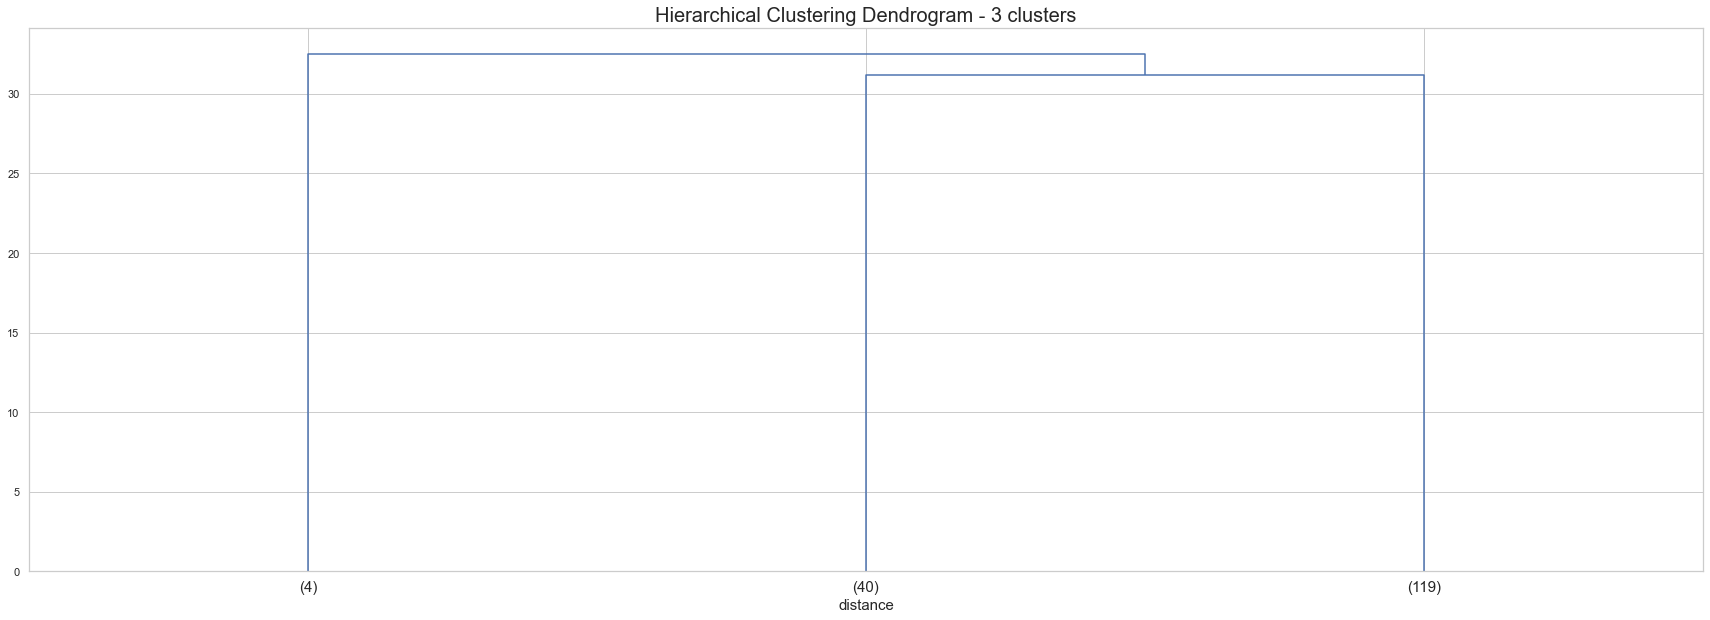

In [107]:
#Détermination de la valeur optimale de K avec la méthode de Ward
#Coupage du dendrogramme en 3 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram - 3 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = fusion_pays.index, p=3, truncate_mode='lastp', leaf_font_size=15)
plt.show()

####  II.3 Interprétation de notre partition et Visualisation nos données 

####  II.3.1  Création des clusters

Nous avons vu comment partitionner nos données. Mais pour présenter les données, il serait bien d’avoir une représentation graphique adaptée

In [55]:
#Identification des 3 groupes obtenus
groupes_cah = fcluster(Z, 3, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

#Index trié des groupes
idg = np.argsort(groupes_cah)

#Affichage des pays selon leurs groupes
df_groupes_cah = pd.DataFrame(fusion_pays.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'Groupe'})

Numérotation de nos groupes : [1 2 3]


In [56]:
#Intégration des groupes dans notre échantillon de départ représenté par le dataframe "fusion_pays"
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah = pd.merge(fusion_pays, df_groupes_cah, on='Pays')
df_groupes_cah.head()

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%),Groupe
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,...,35383.032,36296.113,2.58,-2.67,-2.80,4.87,2057.1,2058.4,0.06,3
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,...,56207.646,57009.756,1.43,-0.14,-0.28,100.00,13897.1,13860.3,-0.26,3
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,...,2886.438,2884.169,-0.08,0.34,0.38,11.76,12291.9,12771.0,3.90,2
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,...,40551.392,41389.189,2.07,-1.10,-0.92,-16.36,11826.2,11737.4,-0.75,3
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,...,82193.768,82658.409,0.57,0.68,0.59,-13.24,51879.7,53071.5,2.30,2


In [57]:
# Affichons la taille de notre dataframe groupé
df_groupes_cah.shape

(163, 22)

In [58]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 3]

In [59]:
df_groupes_cah['Groupe'].unique()

array([3, 2, 1], dtype=int64)

####  II.3.2  Centroîdes

In [60]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah.groupby('Groupe').mean()

,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%)
Groupe,,,,,,,,,,,,,,,,,,,,
1,3105.250000,84.702500,890138.250000,109008.000000,40536.000000,335766.000000,12703.880000,3186.382500,817042.887500,221101.830000,8809.81500,528813.169500,534061.581750,0.925000,-0.325000,-0.36000,2.830000,22449.675000,22889.475000,2.907500
2,3364.750000,106.264000,35252.125000,14774.250000,13642.200000,16528.875000,4080.727500,1198.197750,23696.251750,20975.475500,4163.81125,19274.955125,19334.356650,0.389750,0.724000,0.71700,-5.045500,45036.510000,46383.862500,3.168250
3,2684.756303,72.653277,29394.378151,3860.453782,4197.966387,14601.563025,14252.170336,5230.262941,43586.095194,82437.402243,12478.78297,24198.459529,24633.199992,1.644874,-0.304454,-0.31042,-5.337311,11126.454622,11273.712605,1.800336


In [61]:
centroides = df_groupes_cah.groupby('Groupe').mean()

Les pays qui ont les PIB les plus importants sont du groupe 2

A partir des centroïdes calculés ci-dessus, le groupe 2 se différencie par un fort taux de  disponibilité en protéines,  le  PIB élevé et une meilleure stabilité politique.

####  II.3.3 Matrice de corrélation

<AxesSubplot:ylabel='Groupe'>

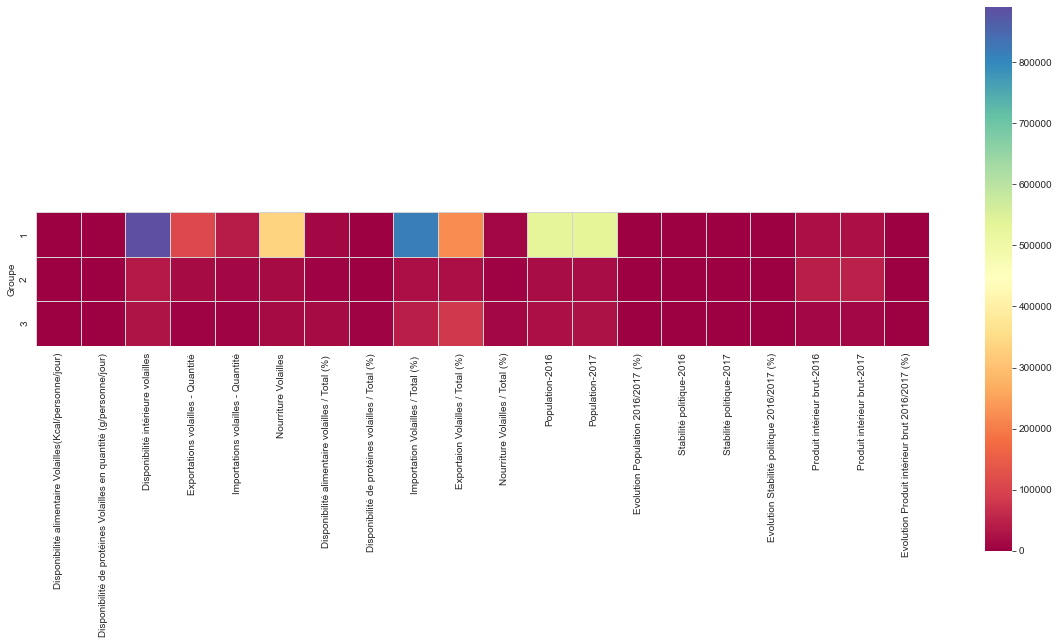

In [62]:
plt.figure(figsize=(20,10)) 
sns.heatmap(centroides, cmap='Spectral', square=True , linecolor="lightgray", linewidths=1 )

Afin d'avoir un meilleur aperçu de nos données nous alons faire des boxplots

####  II.3.4  Visualisation des données (Boxplots)

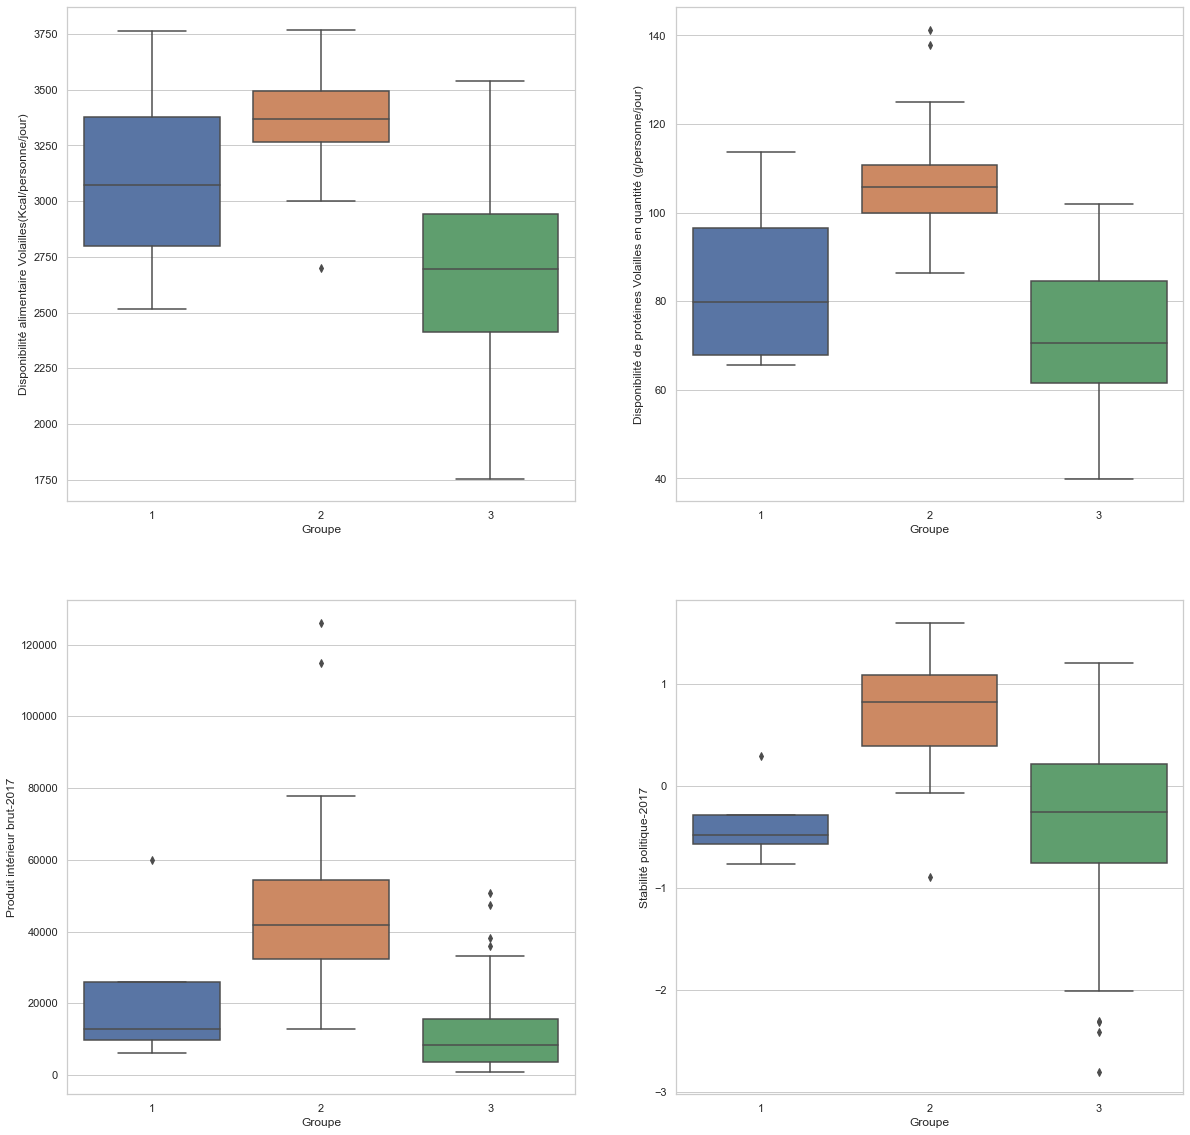

In [63]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Disponibilité alimentaire Volailles(Kcal/personne/jour)')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Disponibilité de protéines Volailles en quantité (g/personne/jour)')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Produit intérieur brut-2017')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Stabilité politique-2017')

plt.show(block=False)

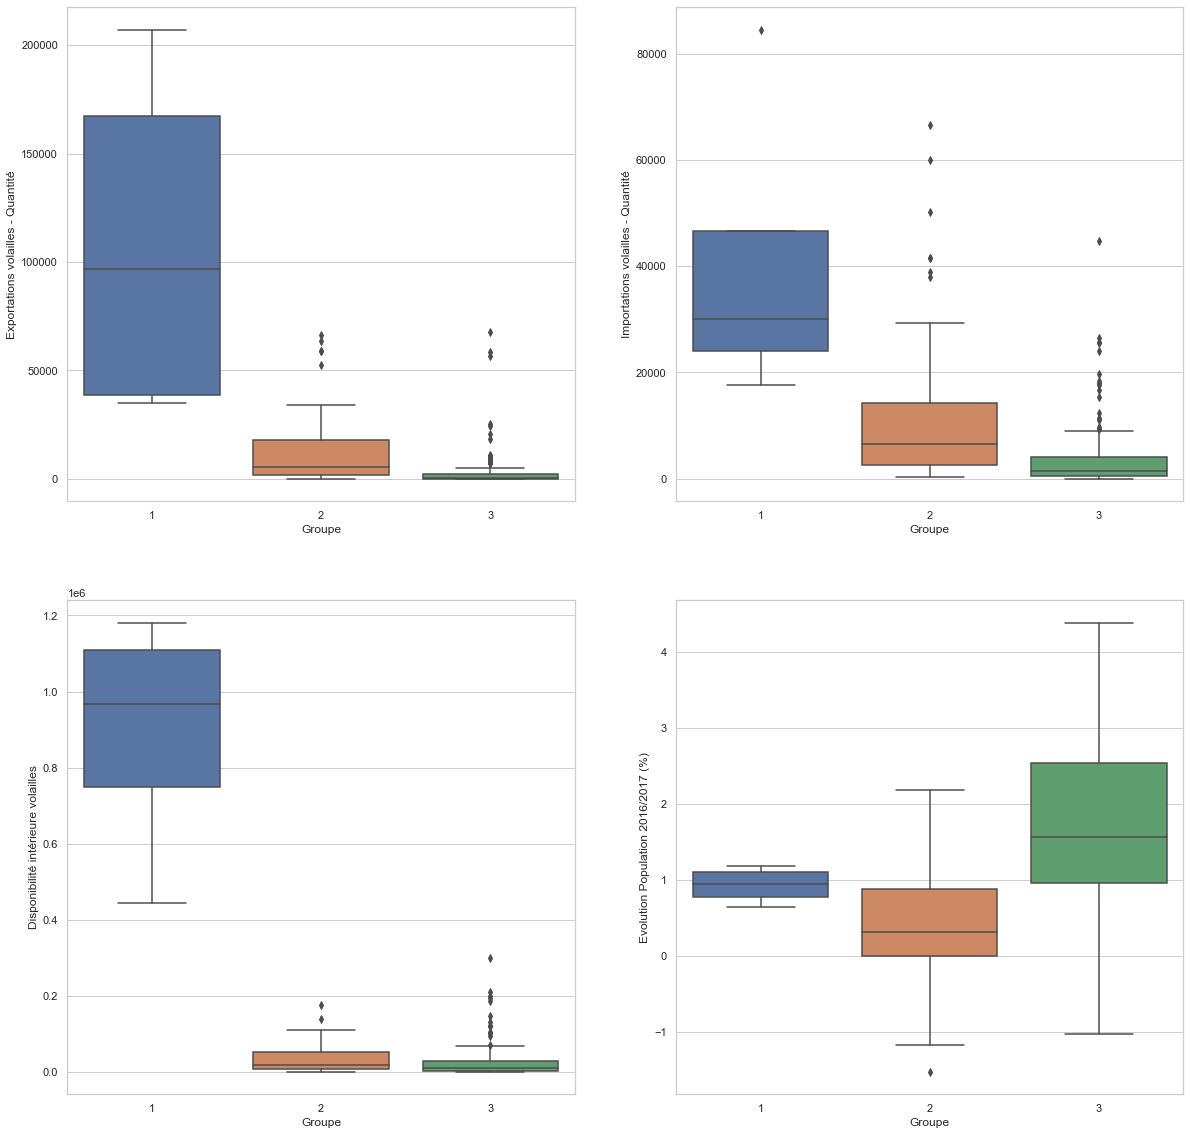

In [64]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Exportations volailles - Quantité')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Importations volailles - Quantité')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Disponibilité intérieure volailles')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Evolution Population 2016/2017 (%)')

plt.show(block=False)

In [65]:
# Affichons les pays du groupe 1
df_groupe1_cah['Pays'].unique()

array(['Brésil', 'Inde', 'Indonésie', "États-Unis d'Amérique"],
      dtype=object)

In [66]:
# Affichons le nombre pays
df_groupe1_cah['Pays'].shape

(4,)

In [67]:
# Affichons les pays du groupe 2
df_groupe2_cah['Pays'].unique()

array(['Albanie', 'Allemagne', 'Argentine', 'Australie', 'Autriche',
       'Belgique', 'Bélarus', 'Canada', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Croatie', 'Danemark', 'Espagne',
       'Estonie', 'Finlande', 'Grèce', 'Hongrie', 'Irlande', 'Islande',
       'Israël', 'Italie', 'Japon', 'Lettonie', 'Lituanie', 'Luxembourg',
       'Malte', 'Monténégro', 'Norvège', 'Nouvelle-Zélande', 'Pays-Bas',
       'Pologne', 'Portugal', 'Roumanie',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'République de Corée', 'Slovénie', 'Suisse', 'Suède', 'Tchéquie',
       'Émirats arabes unis'], dtype=object)

In [68]:
df_groupe2_cah['Pays'].shape

(40,)

In [69]:
# Affichons les pays du groupe 3
df_groupe3_cah['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Algérie', 'Angola',
       'Antigua-et-Barbuda', 'Arabie saoudite', 'Arménie', 'Azerbaïdjan',
       'Bahamas', 'Bangladesh', 'Barbade', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Bulgarie', 'Burkina Faso', 'Bénin', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Chili', 'Chypre', 'Colombie',
       'République démocratique du Congo', 'Costa Rica', "Côte d'Ivoire",
       'Djibouti', 'Dominique', 'El Salvador', 'Eswatini', 'Fidji',
       'Fédération de Russie', 'Gabon', 'Gambie', 'Ghana', 'Grenade',
       'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Géorgie',
       'Haïti', 'Honduras', "Iran (République islamique d')", 'Iraq',
       'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan',
       'Kiribati', 'Koweït', 'Lesotho', 'Liban', 'Libéria',
       'Macédoine du Nord', 'Madagascar', 'Malaisie', 'Malawi',
       'Maldives', 'Mali', 'Maroc', 'Maurice', 'Mauritanie', 'Mexique',


In [70]:
# Affichons le nombre pays
df_groupe3_cah['Pays'].shape

(119,)

 ####  II.3.5 Commentaires 

Les clusters 2 regroupe au contraire des pays en moyenne plus riches. Il regroupe la plupart des pays européens. Ils ont des valeurs moyennes nettement supérieures aux autres groupes : 

- une forte disponibilté kcal
- une forte disponibilité en proteines
- le pib le plus élévé
- Pays stables

Les clusters 1 ne son pas très différents et pourraient être des cibles intéressantes

In [71]:
#Pays du groupe 2 identifiés comme potentiellement intéressants
df_groupe2_cah['Pays'].unique()

array(['Albanie', 'Allemagne', 'Argentine', 'Australie', 'Autriche',
       'Belgique', 'Bélarus', 'Canada', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Croatie', 'Danemark', 'Espagne',
       'Estonie', 'Finlande', 'Grèce', 'Hongrie', 'Irlande', 'Islande',
       'Israël', 'Italie', 'Japon', 'Lettonie', 'Lituanie', 'Luxembourg',
       'Malte', 'Monténégro', 'Norvège', 'Nouvelle-Zélande', 'Pays-Bas',
       'Pologne', 'Portugal', 'Roumanie',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'République de Corée', 'Slovénie', 'Suisse', 'Suède', 'Tchéquie',
       'Émirats arabes unis'], dtype=object)

In [72]:
#Élaboration d'un premier sous-ensemble le groupe 2 validé via la classification hiérarchique
df_cah_subset = df_groupes_cah.query('[2] in Groupe') 
df_cah_subset.shape

(40, 22)

In [73]:
#Visualisation rapide des premières lignes
df_cah_subset.head(40)

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%),Groupe
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,...,2886.438,2884.169,-0.08,0.34,0.38,11.76,12291.9,12771.0,3.90,2
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,...,82193.768,82658.409,0.57,0.68,0.59,-13.24,51879.7,53071.5,2.30,2
8,Argentine,3239.0,102.66,138346.0,63629.0,3391.0,34126.0,1779.67,758.76,42387.50,...,43508.460,43937.140,0.99,0.20,0.17,-15.00,23189.5,23597.1,1.76,2
10,Australie,3307.0,108.01,77921.0,52287.0,6439.0,22296.0,1722.40,650.66,40243.75,...,24262.712,24584.620,1.33,1.05,0.90,-14.29,48116.0,48398.5,0.59,2
11,Autriche,3694.0,108.11,19204.0,7823.0,9485.0,8216.0,5683.08,1443.39,8622.73,...,8747.301,8819.901,0.83,0.91,1.05,15.38,53345.7,54173.0,1.55,2
16,Belgique,3770.0,101.35,32221.0,32418.0,38900.0,11603.0,8568.18,2217.72,11508.88,...,11354.420,11419.748,0.58,0.44,0.43,-2.27,49829.9,50442.3,1.23,2
24,Bélarus,3289.0,94.08,29007.0,7500.0,3858.0,9188.0,3462.11,999.79,18371.43,...,9445.643,9450.231,0.05,0.14,-0.05,-135.71,17883.1,18356.1,2.64,2
29,Canada,3492.0,101.33,82935.0,66205.0,19555.0,33945.0,2267.53,731.10,10744.51,...,36382.944,36732.095,0.96,1.26,1.10,-12.70,47457.6,48317.2,1.81,2
31,Chine - RAS de Hong-Kong,3353.0,137.88,6345.0,3609.0,9647.0,5671.0,1596.67,619.41,1063.62,...,7243.542,7306.322,0.87,0.75,0.83,10.67,58098.4,59842.2,3.00,2
32,Chine - RAS de Macao,2999.0,100.37,445.0,10.0,489.0,449.0,2111.97,843.45,2126.09,...,612.836,622.585,1.59,1.42,1.43,0.70,116520.0,126144.0,8.26,2


### III. Application de l'algorithme du K-Means

####  III.1. Choix du nombre approprié de clusters

Dans cette section, nous allons examiner deux méthodes couramment utilisées pour évaluer le nombre approprié de clusters :

La méthode du coude et
Le coefficient de silhouette

Nous allons maintenant réaliser un clustering K-Means pour plusieurs tailles de clusters, et pour chacune de ces tailles nous allons calculer le coefficient de silhouette, puis l'inertie pour pouvoir ensuite choisir la taille de cluster la plus appropriée. 

La méthode de coude nous aidera a conclure sur ce point.

In [74]:
#Préparation des données pour le clustering K-Means
X = fusion_pays.values

In [75]:
#Centrage / réduction des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

####  III.1.1 La méthode de silhouette 

La méthode de silhouette est une méthode pour trouver le nombre optimal de clusters. Le coefficient de silhouette est une mesure de la similitude d’un point de données à l’intérieur d’un groupe par rapport à d’autres groupes.

Ce coefficient doit être calculer pour chaque point du jeu de données. Pour trouver ce coefficient du i-ème point :

On commence par calculer 
 : la distance moyenne de ce point avec tous les autres points dans les mêmes clusters.
Ensuite, on calcule 
 : la distance moyenne de ce point avec tous les points du cluster le plus proche de son cluster.
Finalement, on calcule 
 (coefficient de silhouette) pour ce i-ème point en utilisant la formule ci-dessous.
 
 

On choisira une plage de valeurs 
 candidates, puis on lancera l'algorithme k-means pour ces valeurs de 
 en calculant à chaque fois le coefficient de silhouette moyen.

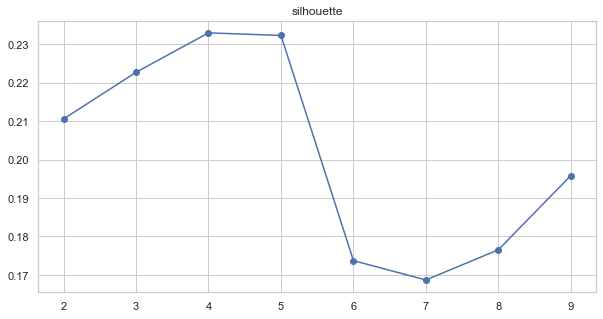

In [76]:
#Calcul de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients

fig =plt.figure(figsize=(10,5))

silhouettes = [] 

#Boucle itérative de 1 à 10 pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.title("silhouette")
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

On remarque que le coefficient de silhouette est maximal pour 
4 , le nombre de clusters adéquats dans ce cas alors est 4. On pourrait également choisir un k=5

####  III.1.2 La méthode d’Elbow

Selon l’algorithme de K-Means, on doit définir au préalable le nombre K de clusters. Le problème qui se pose et de trouver un K optimal. L’une des méthodes les plus populaires pour y arriver est la méthode d’Elbow.

Lorsque l’on trace les distorsions et que le tracé ressemble à un bras, le « coude » (le point d’inflexion de la courbe) est la meilleure valeur de k.

C:\Users\moust\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


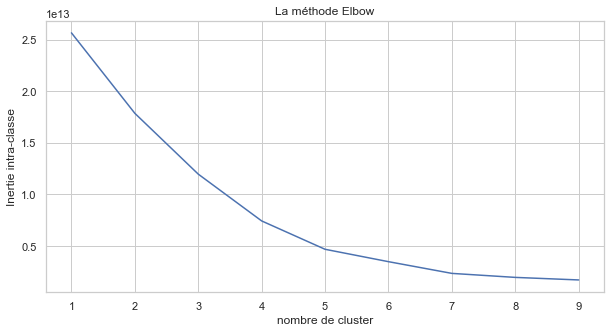

In [77]:
#Détermination de la valeur optimale de K avec la méthode Eblow
fig =plt.figure(figsize=(10,5))
tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(fusion_pays)
    tab.append(kmeans.inertia_)
plt.plot(range(1,10),tab)
plt.title("La méthode Elbow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

On remarque que l’inertie stagne à partir de 5 clusters. 

Le point d’inflexion de la courbe ici se trouve au niveau de 5.

Le nombre de clusters adéquats dans ce cas alors est 5.

In [78]:
#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5)
cls5.fit(X_scaled)

KMeans(n_clusters=5)

In [79]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans5 = cls5.labels_

####  III.2 Visualisation des clusters en ACP pour la projection des données

L'ACP (Analyse en Composante Principale) permettra une visualisation des clusters pays sur le premier plan factoriel (ou plus). Il deviendra alors facile de pouvoir appréhender le "comportement" des différents groupes.

In [80]:
# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

In [81]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.26552956, 0.50160431, 0.59224895, 0.66018806, 0.72304474,
       0.77349122, 0.81877662, 0.85812424, 0.89548464, 0.92609227,
       0.95371547, 0.97392222, 0.99054264, 0.99589607, 0.99833796,
       0.99898023, 0.9995517 , 0.99997342, 0.99999983, 1.        ])

Plus de 50 % de la variance des données est expliquée par ces deux premières composantes.

####  III.2.1  Eboulis des valeurs propres

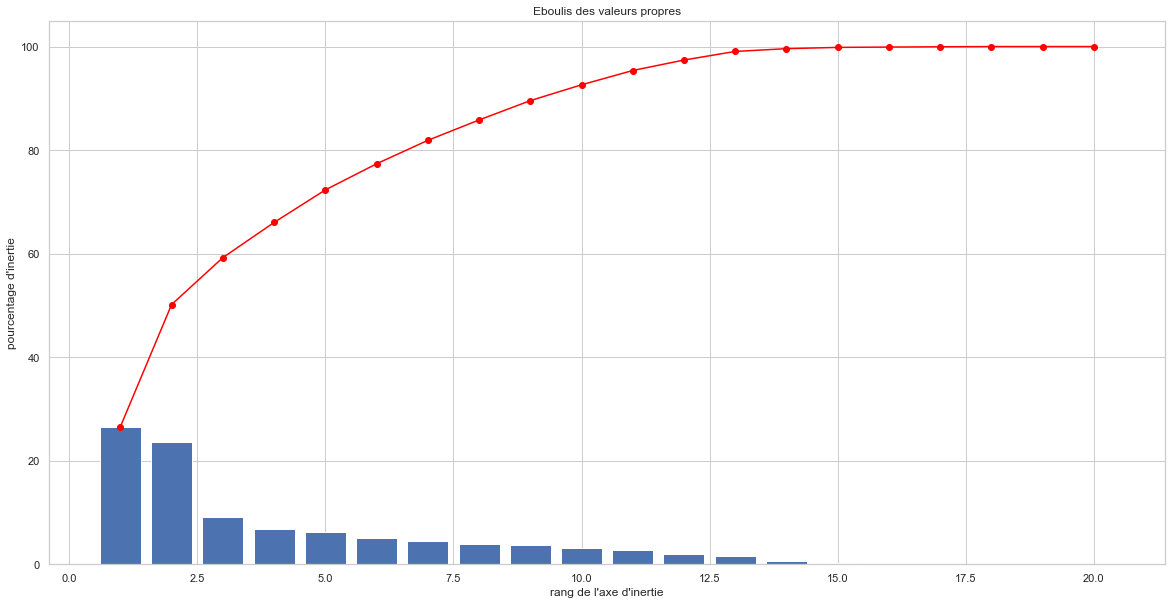

In [82]:
#Représentation de la variance expliquée 
pca = decomposition.PCA()
pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

La méthode du coude précise une forte représentation de nos variables sur les deux premières composantes principales, le premier axe factoriel.

####  III.2.2  Projection ds clusters

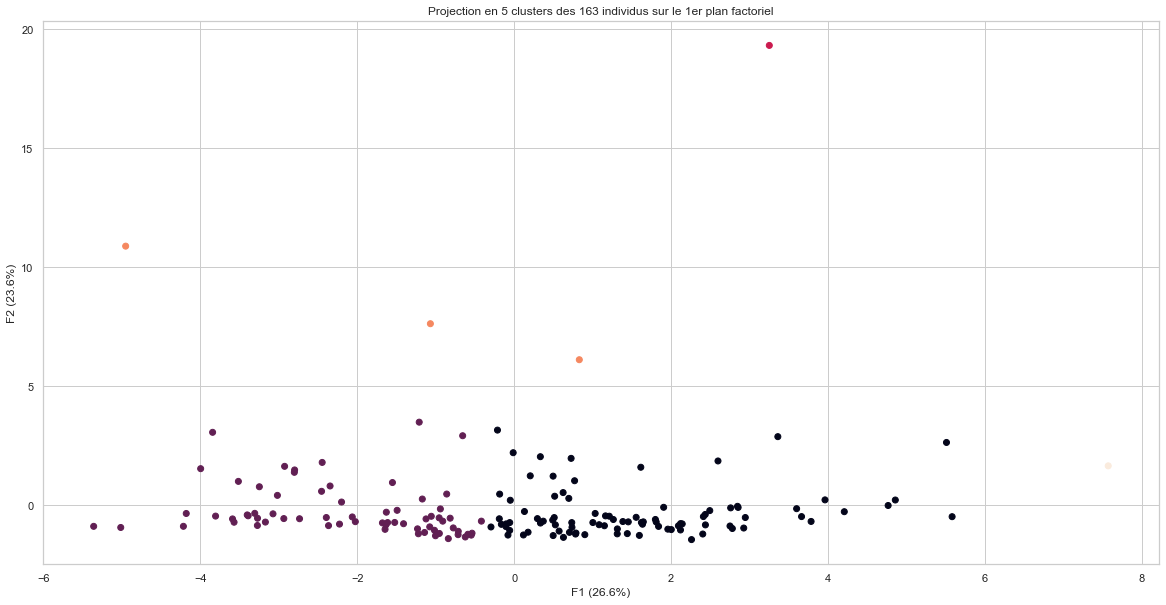

In [83]:
#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 10))


plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters_kmeans5)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.show()

Maintenant, il est nécessaire de caractériser chacun de ces groupes selon nos 5 variables. La position des centroïdes de chacun des groupes indiquera le ou les meilleurs clusters.

####  III.3  Centroîdes

In [84]:
#Tableau des Centroïdes 5 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = cls5.cluster_centers_
pd.DataFrame(centroids, columns=fusion_pays.columns)

,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),Exportaion Volailles / Total (%),Nourriture Volailles / Total (%),Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%)
0,-0.542934,-0.591982,-0.152406,-0.242501,-0.273915,-0.117524,0.336438,0.045653,-0.025831,0.091440,0.095522,-0.081990,-0.080735,0.510699,-0.538354,-0.537531,-0.078586,-0.615316,-0.614134,-0.086749
1,0.704956,0.784629,-0.131046,0.080864,0.217979,-0.129743,-0.439079,-0.228559,-0.170590,-0.161337,-0.285080,-0.159375,-0.160952,-0.673365,0.756224,0.757958,0.097249,0.819438,0.817998,0.074736
2,-0.774539,-0.771165,7.613417,1.079001,2.030951,10.533952,1.314291,0.335118,-0.245163,3.683205,0.568625,11.500433,11.498056,-0.221327,-1.003549,-0.785100,-0.170207,-0.686900,-0.674862,1.273620
3,0.982405,0.489644,4.995950,5.191656,2.713213,2.875877,-0.366746,-0.209910,4.384733,-0.309860,-0.275147,2.035814,2.030030,-0.393035,-0.071669,-0.187348,0.176709,0.408772,0.399538,-0.064111
4,-1.245588,-0.774151,0.026328,-0.327614,-0.340796,0.238075,-0.636131,11.727797,1.015808,-0.012270,11.045296,0.608679,0.622768,1.226344,-1.752780,-1.816222,0.099895,-0.882780,-0.875572,1.644069


A partir des centroïdes calculés ci-dessus, le groupe 2 et4 se différencient par un fort taux de protéines, stabilité politique et le  pib élevé.

#### III.3.1 Heatmap

<AxesSubplot:>

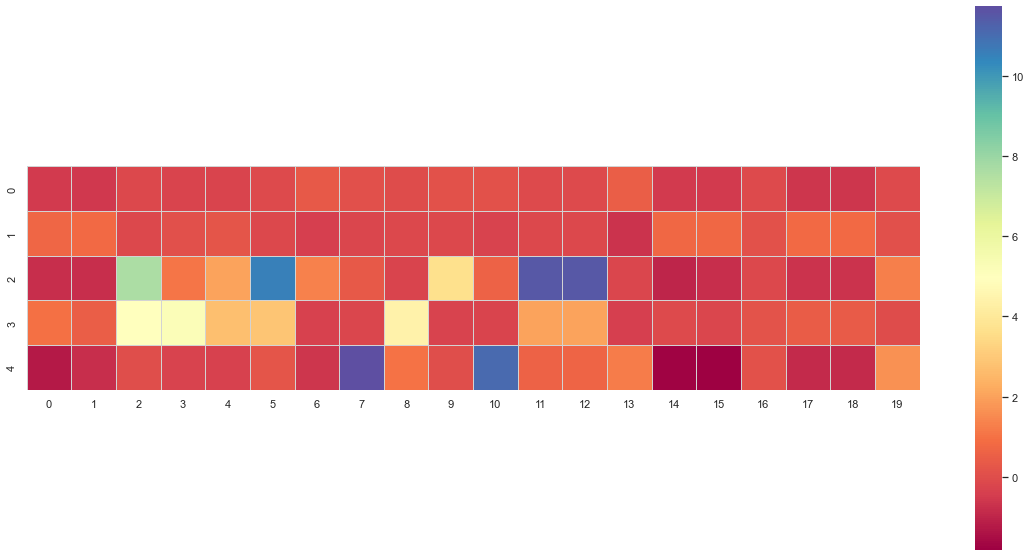

In [104]:
# Représentons nos variables à travers un heatmap
plt.figure(figsize=(20,10)) 
sns.heatmap(centroids, cmap='Spectral', square=True , linecolor="lightgray", linewidths=1 )

In [86]:
#Identification des 5 groupes obtenus

#Index trié des clusters
idk = np.argsort(cls5.labels_)

#Affichage des observations selon leurs clusters
df_cls5 = pd.DataFrame(fusion_pays.index[idk], cls5.labels_[idk]).reset_index()
df_cls5 = df_cls5.rename(columns={'index':'Groupe'})

In [87]:
#Intégration des clusters dans notre dataframe "df_cls5" par la méthode .merge()
#Jointure avec le dataframe initial "df_alim" selon les pays et condition 'inner'
df_cls5 = pd.merge(fusion_pays, df_cls5, on='Pays')
df_cls5.head()

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%),Groupe
0,Afghanistan,1997.0,54.09,15139.0,601.0,4555.0,12968.0,39940.00,10016.67,15706.90,...,35383.032,36296.113,2.58,-2.67,-2.80,4.87,2057.1,2058.4,0.06,0
1,Afrique du Sud,2987.0,83.36,66840.0,10968.0,9020.0,31726.0,2088.81,590.79,1754.86,...,56207.646,57009.756,1.43,-0.14,-0.28,100.00,13897.1,13860.3,-0.26,0
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,...,2886.438,2884.169,-0.08,0.34,0.38,11.76,12291.9,12771.0,3.90,1
3,Algérie,3345.0,92.85,45365.0,743.0,19718.0,33056.0,15204.55,4713.20,985900.00,...,40551.392,41389.189,2.07,-1.10,-0.92,-16.36,11826.2,11737.4,-0.75,0
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,...,82193.768,82658.409,0.57,0.68,0.59,-13.24,51879.7,53071.5,2.30,1


In [89]:
# Affichons les pays par groupe
df_cls5[df_cls5['Groupe'] == 0]['Pays'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Algérie', 'Angola', 'Arménie',
       'Azerbaïdjan', 'Bangladesh', 'Belize',
       'Bolivie (État plurinational de)', 'Botswana', 'Burkina Faso',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Colombie',
       'République démocratique du Congo', "Côte d'Ivoire", 'Djibouti',
       'El Salvador', 'Eswatini', 'Gabon', 'Gambie', 'Ghana', 'Guatemala',
       'Guinée', 'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti',
       'Honduras', "Iran (République islamique d')", 'Iraq', 'Jamaïque',
       'Jordanie', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho',
       'Liban', 'Libéria', 'Macédoine du Nord', 'Madagascar', 'Malawi',
       'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie',
       'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua', 'Niger',
       'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Pakistan',
       'Paraguay', 'Philippines', 'Pérou', 'Rwanda',
       'République centrafricaine', 'République de Moldova',
       'Républiqu

In [90]:
# Affichons les pays par groupe
df_cls5[df_cls5['Groupe'] == 1]['Pays'].unique()

array(['Albanie', 'Allemagne', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine', 'Australie', 'Autriche', 'Bahamas', 'Barbade',
       'Belgique', 'Bosnie-Herzégovine', 'Bulgarie', 'Bélarus', 'Canada',
       'Chili', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chypre', 'Costa Rica', 'Croatie', 'Danemark', 'Dominique',
       'Espagne', 'Estonie', 'Fidji', 'Finlande', 'Fédération de Russie',
       'Grenade', 'Grèce', 'Hongrie', 'Irlande', 'Islande', 'Israël',
       'Italie', 'Japon', 'Kazakhstan', 'Koweït', 'Lettonie', 'Lituanie',
       'Luxembourg', 'Malaisie', 'Malte', 'Maurice', 'Mexique',
       'Monténégro', 'Norvège', 'Nouvelle-Zélande', 'Oman', 'Panama',
       'Pays-Bas', 'Pologne', 'Portugal', 'Roumanie',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'République de Corée', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
       'Serbie', 'Slovaquie', 'Slovénie', 'Suisse', 'Suède', 'T

In [91]:
# Affichons les pays par groupe
df_cls5[df_cls5['Groupe'] == 2]['Pays'].unique()

array(['Inde'], dtype=object)

In [92]:
# Affichons les pays par groupe
df_cls5[df_cls5['Groupe'] == 3]['Pays'].unique()

array(['Brésil', 'Indonésie', "États-Unis d'Amérique"], dtype=object)

In [93]:
# Affichons les pays par groupe
df_cls5[df_cls5['Groupe'] == 4]['Pays'].unique()

array(['Éthiopie'], dtype=object)

In [101]:
#La correspondance avec les groupes du partitionnement hiérarchique peut-être analysée avec une méthode .crosstab()
pd.crosstab(groupes_cah, cls5.labels_)

col_0,0,1,2,3,4
row_0,,,,,
1,0,0,1,3,0
2,0,40,0,0,0
3,90,28,0,0,1


Sur la méthode hiérarchique le choix a été fait sur le cluster 2,  avec le K-Means c'est le clusters 2. 
Les correspondances ci-dessus montrent plusieurs pays communs (40) aux deux approches.

####  III.3.2  Visualisation des données (Boxplots)

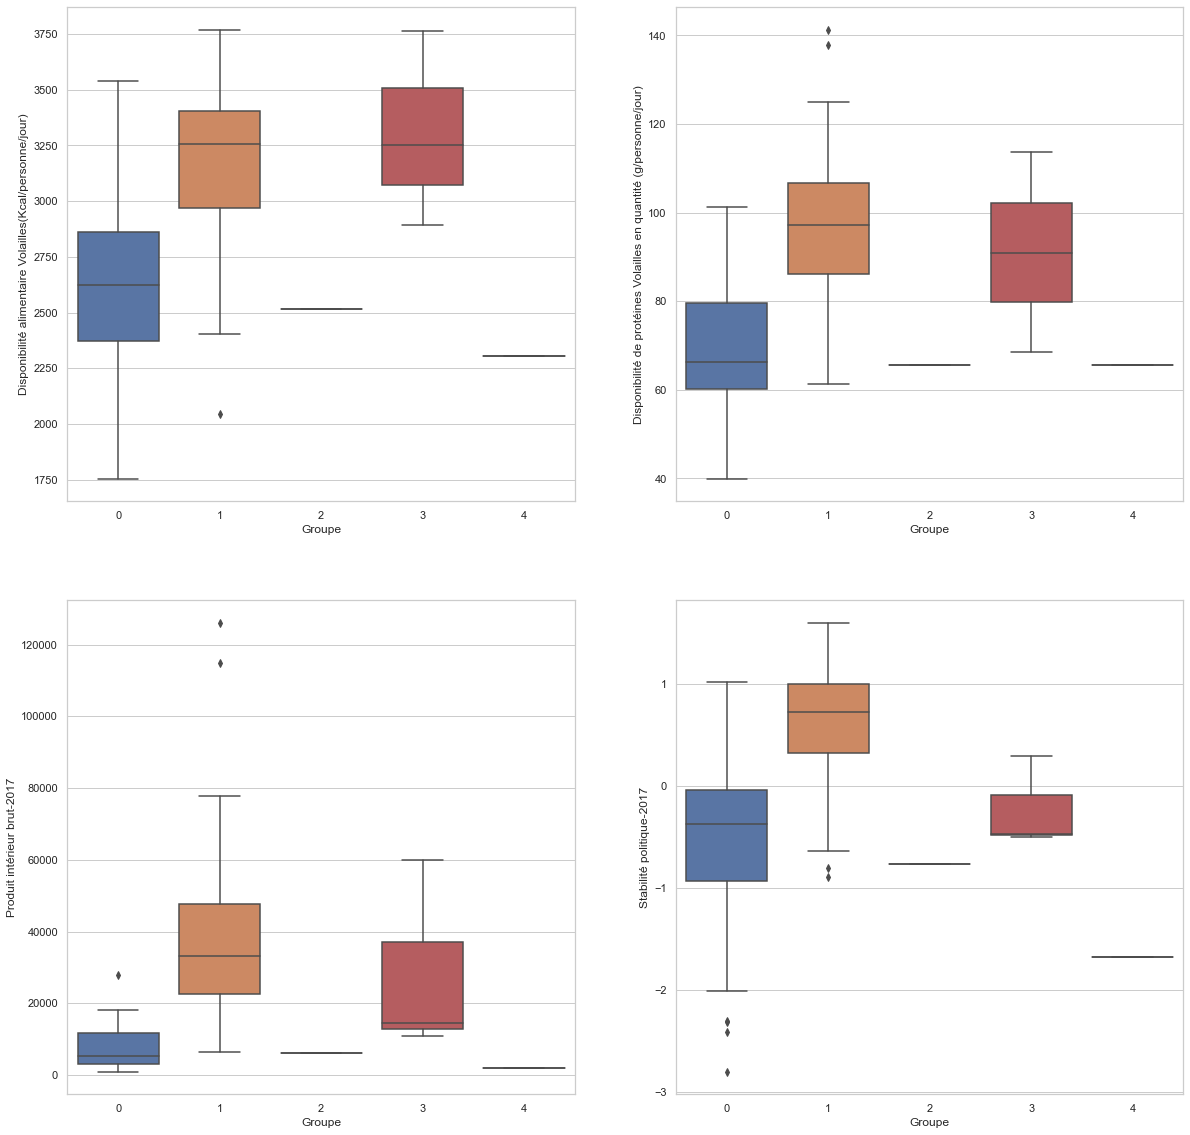

In [96]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='Groupe', y='Disponibilité alimentaire Volailles(Kcal/personne/jour)')

plt.subplot(222)
sns.boxplot(data=df_cls5, x='Groupe', y='Disponibilité de protéines Volailles en quantité (g/personne/jour)')

plt.subplot(223)
sns.boxplot(data=df_cls5, x='Groupe', y='Produit intérieur brut-2017')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='Groupe', y='Stabilité politique-2017')

plt.show(block=False)

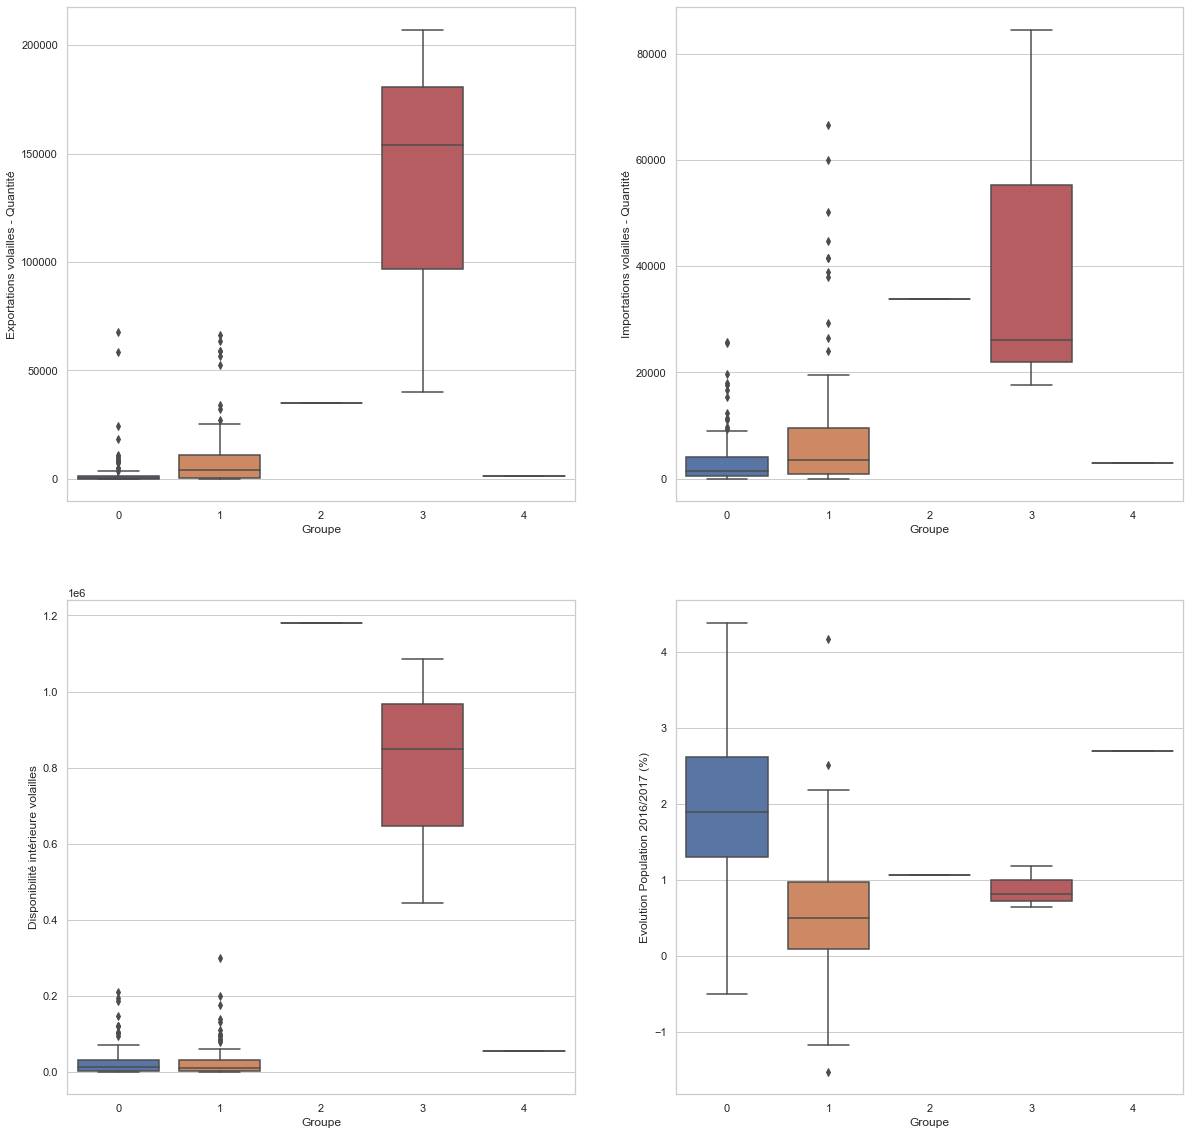

In [97]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_cls5, x='Groupe', y='Exportations volailles - Quantité')

plt.subplot(222)
sns.boxplot(data=df_cls5, x='Groupe', y='Importations volailles - Quantité')

plt.subplot(223)
sns.boxplot(data=df_cls5, x='Groupe', y='Disponibilité intérieure volailles')

plt.subplot(224)
sns.boxplot(data=df_cls5, x='Groupe', y='Evolution Population 2016/2017 (%)')

plt.show(block=False)

In [105]:
#Création d'un sous-ensemble avec sélection des pays dU cluster 3
df_cls_subset = df_cls5.query('[1] in Groupe') 
df_cls_subset.shape

(68, 22)

In [106]:
#Visualisation des premières lignes de notre nouvel échantillon 
#Les correspondances des clusters sont bien intégrés…
df_cls_subset

,Pays,Disponibilité alimentaire Volailles(Kcal/personne/jour),Disponibilité de protéines Volailles en quantité (g/personne/jour),Disponibilité intérieure volailles,Exportations volailles - Quantité,Importations volailles - Quantité,Nourriture Volailles,Disponibilité alimentaire volailles / Total (%),Disponibilité de protéines volailles / Total (%),Importation Volailles / Total (%),...,Population-2016,Population-2017,Evolution Population 2016/2017 (%),Stabilité politique-2016,Stabilité politique-2017,Evolution Stabilité politique 2016/2017 (%),Produit intérieur brut-2016,Produit intérieur brut-2017,Evolution Produit intérieur brut 2016/2017 (%),Groupe
2,Albanie,3400.0,119.50,4879.0,156.0,884.0,3631.0,4000.00,1908.95,2326.32,...,2886.438,2884.169,-0.08,0.34,0.38,11.76,12291.9,12771.0,3.90,1
4,Allemagne,3559.0,104.07,174960.0,58793.0,66550.0,77988.0,5012.68,1307.41,7903.80,...,82193.768,82658.409,0.57,0.68,0.59,-13.24,51879.7,53071.5,2.30,1
6,Antigua-et-Barbuda,2429.0,81.15,84.0,0.0,71.0,59.0,1042.49,456.67,1014.29,...,94.527,95.426,0.95,0.88,0.75,-14.77,19419.6,19840.3,2.17,1
7,Arabie saoudite,3194.0,87.51,32403.0,2241.0,26414.0,18086.0,2115.23,562.04,3658.45,...,32443.447,33101.179,2.03,-0.46,-0.64,39.13,48625.8,47306.2,-2.71,1
8,Argentine,3239.0,102.66,138346.0,63629.0,3391.0,34126.0,1779.67,758.76,42387.50,...,43508.460,43937.140,0.99,0.20,0.17,-15.00,23189.5,23597.1,1.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Suède,3214.0,107.03,16839.0,5401.0,7939.0,9200.0,5268.85,1509.59,9451.19,...,9836.007,9904.896,0.70,1.02,0.98,-3.92,51334.4,51948.0,1.20,1
143,Tchéquie,3275.0,86.48,20651.0,8951.0,6406.0,9251.0,3993.90,1153.07,5522.41,...,10618.857,10641.034,0.21,0.98,1.00,2.04,37015.0,38824.9,4.89,1
147,Trinité-et-Tobago,3039.0,84.66,893.0,176.0,732.0,704.0,1607.94,509.08,3182.61,...,1377.560,1384.059,0.47,0.29,0.28,-3.45,28161.6,27277.9,-3.14,1
152,Uruguay,3151.0,84.26,4440.0,7236.0,973.0,2617.0,9548.48,2837.04,32433.33,...,3424.129,3436.641,0.37,1.06,1.05,-0.94,22724.0,23009.9,1.26,1


### IV. Recommandations

Première option

Un développement orienté vers l'UE d'abord : Les territoires cibles seraient (Ceux qui partagent la même frontière terrestre avec la France) :

- Allemagne (448 km)

- Belgique (620 km)

- Italie (515 km)

- Espagne (623 km)

- Suisse (573 km)

- Luxembourg (73 km)

...

Ce groupe de pays ne fait pas seulement partie de l'Union européenne par le biais de l'aide monétaire et du transport, ils ont également un rôle important en ce qui concerne leur accessibilité , en disponibilité alimentaire, PIB/habitant, Stabilité politique.

Deuxième option,

Un développement orienté vers les pays extérieurs à l'UE : toujours dans la même logique, des pays comme :

- Fédération de Russie : L'appartenance de la France à l'OTAN va rendre difficile les échanges.

- Honkong, Arabie saoudite, Emirats Arabes Unis, peuvent toujours être intéressants, cependant, les restrictions monétaires, les transports et d'autres mécanismes seront très probablement être présent, les spécificités de la mécanique ne seront pas les mêmes.